# Analysis for RNA-DNA p-brain tissue sample

2021-04-23 smRNA and 04-26 CTP-09 MOP marker gene DNA-MERFISH

by Pu Zheng

2020.04.30


cortex: 2-7
thalamus 83-88
hippo: 63,64,66,67,68,70

# 0. required packages for h5py

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

9896


# 1. Create field-of-view class

In [22]:
reload(ia)
reload(classes)
reload(get_img_info)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09',
             'save_folder':r'\\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09',
             'experiment_type': 'DNA',
             'num_threads': 20,
             'correction_folder':r'I:\Corrections\20210621-Corrections_lumencor',
             'shared_parameters':{
                     'single_im_size':[60,2048,2048],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':False,
                     'min_num_seeds':250,
                     'max_num_seeds': 2000,
                     'spot_seeding_th': 150,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 }, 
             }

In [3]:
hdf5_folder = r'\\10.245.74.40\Turing3\Pu\Analyzed_Data\20210624-P_Forebrain_smFISH_CTP09'
files = [_fl for _fl in os.listdir(hdf5_folder) if _fl.split(os.extsep)[-1]=='hdf5']
fov_ids = sorted([int(_fl.split(os.extsep)[0].split('_')[-1]) for _fl in files])

#fov_ids = np.arange(31,40)

save_folder = r'\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation'
print(fov_ids)

[0, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 63, 64, 66, 67, 68, 70, 83, 84, 85, 86, 87, 88]


Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_00.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_parameters
++ base attributes loaded:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'col

E:\Users\puzheng\AppData\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


2021-09-11 02:06:48,162 [INFO] 100%|##########| 14/14 [00:31<00:00,  2.23s/it]
2021-09-11 02:06:48,162 [INFO] network run in 31.24s


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\torch\nn\functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


:> 14
2021-09-11 02:06:56,289 [INFO] stitching 14 masks using stitch_threshold=0.200 to make 3D masks
2021-09-11 02:06:58,044 [INFO] masks created in 9.88s
2021-09-11 02:06:59,146 [INFO] >>>> TOTAL TIME 43.57 sec
- start merging 3d masks
-- overlap found for cell:7 to 185 0.6252260397830018 0.6736483195323916
-- overlap found for cell:15 to 122 0.24507361268403172 0.27378542510121456
-- overlap found for cell:17 to 107 0.3125483122906467 0.35750073681108163
-- overlap found for cell:21 to 22 0.2805894900135738 0.24939675973802136
-- overlap found for cell:21 to 98 0.2338568935427574 0.7148784825133373
-- overlap found for cell:21 to 109 0.054682955206515414 0.22416534181240064
-- overlap found for cell:21 to 177 0.05235602094240838 0.09726224783861671
-- overlap found for cell:22 to 29 0.13598759048603928 0.10527018012008005
-- overlap found for cell:22 to 92 0.0401585660117201 0.04557011539213769
-- overlap found for cell:22 to 98 0.2718028266115133 0.9347954949614701
--- redo 22
-- o

-- overlap found for cell:108 to 122 1.0 0.0792004048582996
--- skip 108
-- overlap found for cell:110 to 112 0.04184884447220487 0.0283657917019475
-- overlap found for cell:111 to 124 0.255783212161269 0.1355991590749825
-- overlap found for cell:128 to 140 0.1865070227953028 0.9070548712206047
--- redo 128
-- overlap found for cell:128 to 170 0.2740623587889742 0.8745493871665465
-- overlap found for cell:131 to 133 0.15044994375703036 0.8857615894039735
-- overlap found for cell:145 to 164 0.32691239118355253 1.0
--- redo 145
-- overlap found for cell:148 to 168 0.11744154797097554 0.9219409282700421
--- redo 148
-- overlap found for cell:153 to 165 0.027777777777777776 0.023719988429273937
-- overlap found for cell:157 to 165 1.0 0.10355799826439109
--- skip 157
-- overlap found for cell:159 to 184 0.9881188118811881 0.49454905847373637
--- skip 159
-- overlap found for cell:167 to 197 0.272218073188947 0.9529411764705882
--- redo 167
-- overlap found for cell:173 to 194 0.4746569

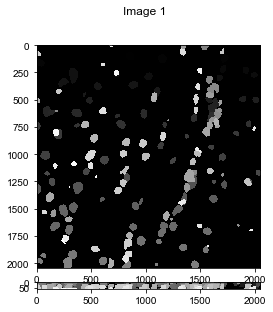

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_00
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_02.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

E:\Users\puzheng\AppData\anaconda3\lib\site-packages\torch\nn\functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


:> 14
2021-09-11 02:19:36,415 [INFO] stitching 14 masks using stitch_threshold=0.200 to make 3D masks
2021-09-11 02:19:37,046 [INFO] masks created in 8.29s
2021-09-11 02:19:38,014 [INFO] >>>> TOTAL TIME 28.68 sec
- start merging 3d masks
-- overlap found for cell:2 to 110 0.39153696498054474 0.9182509505703422
--- redo 2
-- overlap found for cell:7 to 10 0.11112416304475509 0.14721444133208839
-- overlap found for cell:12 to 106 0.09118483412322274 0.10951730418943534
-- overlap found for cell:16 to 114 0.06211066324661048 0.06345937850992138
-- overlap found for cell:21 to 119 0.05049471170249062 1.0
--- redo 21
-- overlap found for cell:24 to 120 0.30507343124165553 0.6338418862690708
-- overlap found for cell:29 to 132 0.0440563086548488 1.0
--- redo 29
-- overlap found for cell:32 to 33 1.0 0.1061162740436568
--- skip 32
-- overlap found for cell:33 to 101 0.10881780851523666 0.16231463571889104
-- overlap found for cell:33 to 112 0.234709314890858 1.0
--- redo 33
-- overlap found 

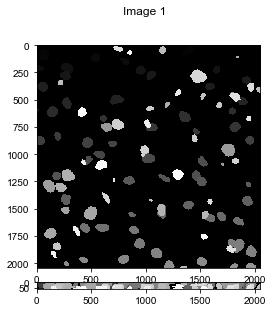

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_02
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_03.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:93 to 94 0.4032689868958715 0.7185538538789857
-- overlap found for cell:95 to 96 0.3680266444629475 0.06833642547928262
-- overlap found for cell:96 to 102 0.04483611626468769 0.040713182647760776
-- overlap found for cell:97 to 198 0.02386117136659436 0.3055555555555556
-- overlap found for cell:101 to 129 0.3048505358150028 0.9474145486415425
--- redo 101
-- overlap found for cell:104 to 188 0.18868832731648616 1.0
--- redo 104
-- overlap found for cell:104 to 200 0.3191335740072202 0.9833147942157954
--- redo 104
-- overlap found for cell:105 to 130 1.0 0.08536368486573004
--- skip 105
-- overlap found for cell:107 to 110 0.07015276145710929 0.16643434625034847
-- overlap found for cell:107 to 132 0.29694477085781434 0.9790778767919411
--- redo 107
-- overlap found for cell:107 to 110 0.07111163007940215 0.16977976024533037
-- overlap found for cell:116 to 145 0.13481508471488432 0.9840425531914894
--- redo 116
-- overlap found for cell:116 to 152 0.940374

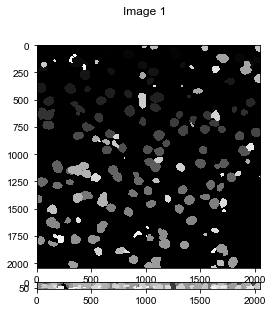

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_03
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_04.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:82 to 152 0.06072172102706454 0.08023842274186153
-- overlap found for cell:82 to 156 0.07147814018043026 0.34134217067108535
-- overlap found for cell:83 to 158 0.04897459442913989 1.0
--- redo 83
-- overlap found for cell:84 to 88 0.03329506314580941 0.06202471482889734
-- overlap found for cell:84 to 125 0.13892078071182548 0.989100817438692
--- redo 84
-- overlap found for cell:84 to 88 0.03324417271685136 0.06202471482889734
-- overlap found for cell:85 to 130 0.3237846026718083 0.3321559762644815
-- overlap found for cell:85 to 159 0.030849745214157828 1.0
--- redo 85
-- overlap found for cell:85 to 130 0.3237846026718083 0.3321559762644815
-- overlap found for cell:90 to 113 0.11377964575202641 1.0
--- redo 90
-- overlap found for cell:90 to 146 0.13569498649054337 0.7495854063018242
-- overlap found for cell:90 to 149 0.023566496547583308 0.6946902654867256
-- overlap found for cell:92 to 160 0.04337604325849301 1.0
--- redo 92
-- overlap found for cel

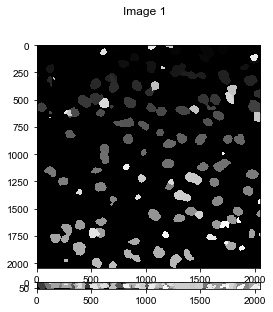

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_04
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_05.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:80 to 163 0.24127973250246978 1.0
--- redo 80
-- overlap found for cell:83 to 133 0.029424633559396195 1.0
--- redo 83
-- overlap found for cell:83 to 135 0.18825202362721505 0.583785617367707
-- overlap found for cell:83 to 155 0.01957996062130825 0.036242154282243366
-- overlap found for cell:87 to 115 0.35148514851485146 1.0
--- redo 87
-- overlap found for cell:91 to 119 1.0 0.43343343343343343
--- skip 91
-- overlap found for cell:92 to 122 0.15893694632621158 1.0
--- redo 92
-- overlap found for cell:95 to 107 1.0 0.0380039656311963
--- skip 95
-- overlap found for cell:99 to 154 0.12401333099456235 0.11944585233992229
-- overlap found for cell:102 to 170 0.6849217638691323 1.0
--- redo 102
-- overlap found for cell:110 to 161 0.38782608695652177 1.0
--- redo 110
-- overlap found for cell:112 to 137 0.04092560719066743 1.0
--- redo 112
-- overlap found for cell:116 to 141 0.12357272436239462 1.0
--- redo 116
-- overlap found for cell:124 to 154 0.9967576

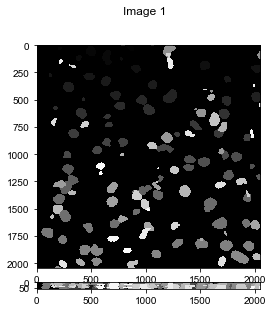

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_05
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_06.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:85 to 208 0.08190936106983655 1.0
--- redo 85
-- overlap found for cell:85 to 88 0.4210624071322437 0.8293396744100969
-- overlap found for cell:87 to 172 0.004291845493562232 0.006892024942566459
-- overlap found for cell:90 to 152 0.27967340970021937 1.0
--- redo 90
-- overlap found for cell:90 to 176 0.3469412624908603 1.0
--- redo 90
-- overlap found for cell:92 to 140 0.34366925064599485 0.7228260869565217
-- overlap found for cell:95 to 101 0.003032600454890068 0.0032460945425035505
-- overlap found for cell:95 to 153 0.08718726307808947 1.0
--- redo 95
-- overlap found for cell:95 to 101 0.003032600454890068 0.0032460945425035505
-- overlap found for cell:96 to 167 0.7054169202678028 0.5994310835272821
-- overlap found for cell:98 to 130 0.17675544794188863 0.5927350427350427
-- overlap found for cell:101 to 104 0.252789612497464 0.17982392841679895
-- overlap found for cell:101 to 106 0.00426049908703591 0.023917995444191344
-- overlap found for cell:1

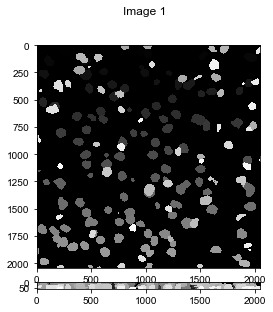

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_06
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_07.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

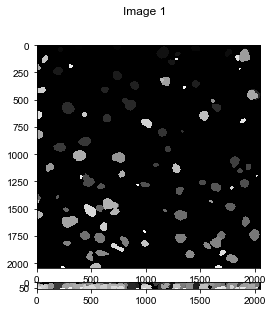

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_07
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_11.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

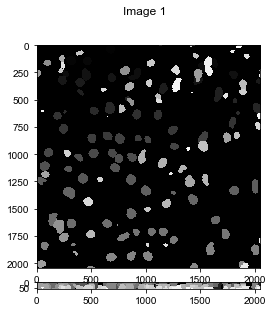

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_11
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_12.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

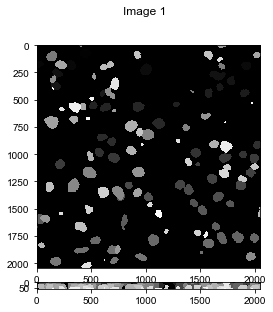

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_12
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_13.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:99 to 124 0.09051724137931035 1.0
--- redo 99
-- overlap found for cell:104 to 162 0.1741374626460201 0.6870310825294748
-- overlap found for cell:111 to 119 1.0 0.03196187819618782
--- skip 111
-- overlap found for cell:119 to 141 0.1915388191538819 1.0
--- redo 119
-- overlap found for cell:125 to 139 1.0 0.16735587448309414
--- skip 125
-- overlap found for cell:129 to 130 0.1650485436893204 0.024525968672712284
-- overlap found for cell:146 to 163 0.19653543307086613 0.9050036258158085
--- redo 146
-- overlap found for cell:154 to 158 1.0 0.08349514563106795
--- skip 154
- 138 labels kept.
- finish in 481.69s. 
- reconstruct 60 layers


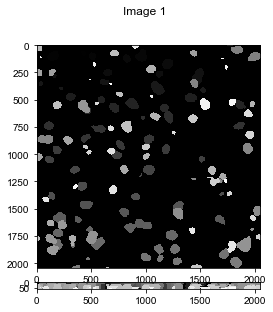

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_13
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_14.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:67 to 126 0.09760617760617761 0.09651802076970067
-- overlap found for cell:68 to 69 0.0792344839921302 0.04069446996141834
-- overlap found for cell:69 to 140 0.15193826933676283 1.0
--- redo 69
-- overlap found for cell:70 to 86 0.30304772857964346 0.8227946916471507
-- overlap found for cell:72 to 144 0.06756109247724006 0.289825282631038
-- overlap found for cell:74 to 142 0.3340221222802966 0.8018675226145316
-- overlap found for cell:75 to 87 1.0 0.08235666772252138
--- skip 75
-- overlap found for cell:78 to 79 0.09019221291276491 0.048541114058355435
-- overlap found for cell:80 to 134 0.40398126463700235 1.0
--- redo 80
-- overlap found for cell:85 to 126 0.5382619974059663 0.2535125229077581
-- overlap found for cell:87 to 112 0.12036743744060817 1.0
--- redo 87
-- overlap found for cell:87 to 131 1.0 0.6082851637764932
--- skip 87
-- overlap found for cell:89 to 90 0.15843621399176955 0.8759048603929679
-- overlap found for cell:91 to 166 0.20427364

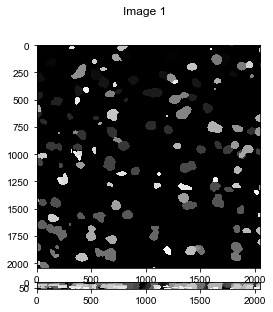

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_14
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_15.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:66 to 115 0.2200969827586207 1.0
--- redo 66
-- overlap found for cell:66 to 141 0.3802083333333333 0.9222391635809192
--- redo 66
-- overlap found for cell:68 to 127 0.10197368421052631 0.5619335347432024
-- overlap found for cell:72 to 128 0.20416511714391966 1.0
--- redo 72
-- overlap found for cell:76 to 137 0.3125194481900218 1.0
--- redo 76
-- overlap found for cell:77 to 103 0.42651530508818164 0.9311794644832928
--- redo 77
-- overlap found for cell:77 to 143 0.4454161344207527 0.9945151382185169
--- redo 77
-- overlap found for cell:81 to 129 0.8993338267949667 0.8327621658670322
-- overlap found for cell:85 to 138 0.9574419139636531 0.6998486631915252
--- skip 85
-- overlap found for cell:87 to 130 0.29051069093479415 0.2473296223860388
-- overlap found for cell:88 to 161 0.16280825364871665 0.9908116385911179
--- redo 88
-- overlap found for cell:89 to 138 0.0050323508267433505 0.003424657534246575
-- overlap found for cell:90 to 167 0.1131850082126

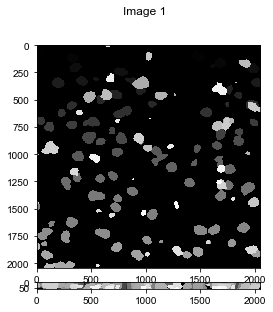

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_15
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_16.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:122 to 130 1.0 0.10224438902743142
--- skip 122
-- overlap found for cell:125 to 132 1.0 0.05663304887509697
--- skip 125
-- overlap found for cell:127 to 133 1.0 0.04235447437011294
--- skip 127
-- overlap found for cell:133 to 151 0.025738488271068637 0.08640174990885892
-- overlap found for cell:139 to 151 0.035788024776324846 0.018957345971563982
- 132 labels kept.
- finish in 455.71s. 
- reconstruct 60 layers


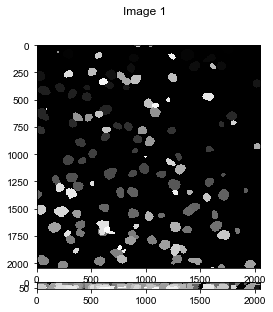

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_16
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_17.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

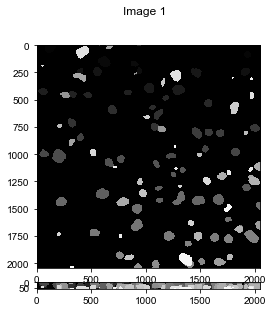

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_17
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_18.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

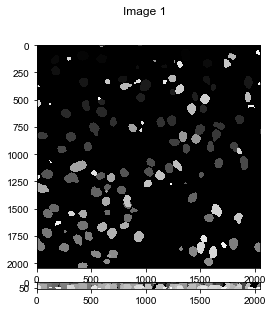

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_18
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_21.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

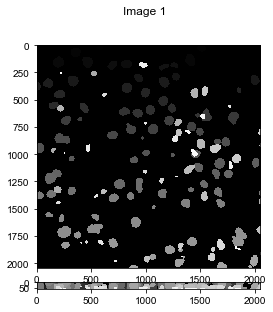

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_21
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_22.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

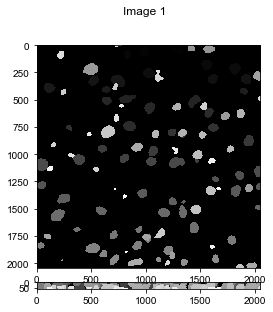

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_22
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_23.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:92 to 148 0.04462540716612378 0.9194630872483222
--- redo 92
-- overlap found for cell:92 to 125 0.28780012978585334 0.23354397051079515
-- overlap found for cell:93 to 105 1.0 0.05925190334326382
--- skip 93
-- overlap found for cell:115 to 121 1.0 0.06999442275515895
--- skip 115
-- overlap found for cell:119 to 127 0.24755954705193284 0.39550842170929507
-- overlap found for cell:122 to 129 1.0 0.4556143445032334
--- skip 122
-- overlap found for cell:124 to 142 0.24329643296432965 1.0
--- redo 124
-- overlap found for cell:126 to 127 0.29434250764525993 0.24017467248908297
-- overlap found for cell:134 to 144 0.11307137129109864 1.0
--- redo 134
-- overlap found for cell:138 to 143 0.058611722344468896 1.0
--- redo 138
- 125 labels kept.
- finish in 416.99s. 
- reconstruct 60 layers


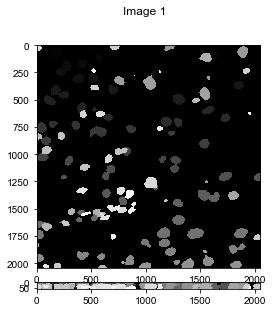

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_23
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_24.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:69 to 163 0.07817929117442668 1.0
--- redo 69
-- overlap found for cell:69 to 70 0.14153347231873986 0.3977864583333333
-- overlap found for cell:69 to 74 0.18890433171183693 0.1717203621815119
-- overlap found for cell:70 to 74 1.0 0.32343651295009473
--- skip 70
-- overlap found for cell:73 to 110 1.0 0.09217791411042944
--- skip 73
-- overlap found for cell:74 to 79 0.16392924826279218 1.0
--- redo 74
-- overlap found for cell:76 to 111 0.8839876488751655 0.5286204167765761
-- overlap found for cell:80 to 179 0.042164599774520854 1.0
--- redo 80
-- overlap found for cell:83 to 152 0.002152852529601722 0.0015424164524421595
-- overlap found for cell:84 to 88 0.0027666769136181985 0.001750291715285881
-- overlap found for cell:85 to 121 0.8141383392524945 0.7149858903906134
-- overlap found for cell:86 to 90 0.7086456771614192 0.39853850477796515
-- overlap found for cell:92 to 141 0.10182063385030343 0.06324607329842932
-- overlap found for cell:94 to 122 0.

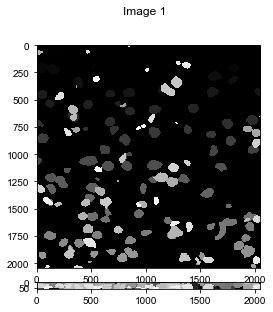

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_24
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_25.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:112 to 197 0.08356417359187442 1.0
--- redo 112
-- overlap found for cell:113 to 193 0.36300417246175243 0.6726804123711341
-- overlap found for cell:117 to 139 1.0 0.3383479593258114
--- skip 117
-- overlap found for cell:118 to 140 1.0 0.08800370541917554
--- skip 118
-- overlap found for cell:121 to 148 0.9873466257668712 0.5574799740203508
--- skip 121
-- overlap found for cell:122 to 123 1.0 0.1365099806825499
--- skip 122
-- overlap found for cell:125 to 164 0.10694769711163153 1.0
--- redo 125
-- overlap found for cell:131 to 196 0.07209737827715355 1.0
--- redo 131
-- overlap found for cell:135 to 173 0.07412643910321147 0.05703185703185703
-- overlap found for cell:139 to 188 0.1345591307981613 1.0
--- redo 139
-- overlap found for cell:141 to 170 0.014078437006177273 0.03485064011379801
-- overlap found for cell:145 to 152 1.0 0.1935565064183237
--- skip 145
-- overlap found for cell:149 to 178 0.20741989881956155 1.0
--- redo 149
-- overlap found fo

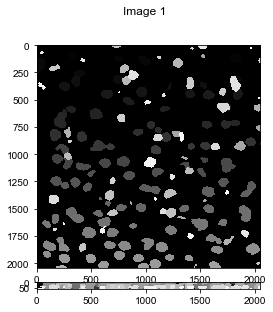

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_25
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_26.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:155 to 174 0.7924528301886793 0.6245353159851301
-- overlap found for cell:157 to 170 0.1388380603842635 1.0
--- redo 157
-- overlap found for cell:157 to 171 0.08142726440988106 1.0
--- redo 157
- 150 labels kept.
- finish in 539.84s. 
- reconstruct 60 layers


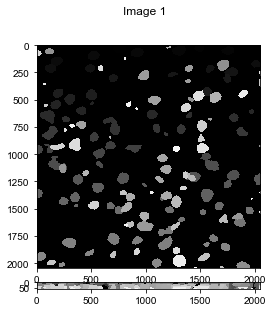

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_26
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_27.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

--- redo 91
-- overlap found for cell:92 to 114 1.0 0.3888109708586567
--- skip 92
-- overlap found for cell:93 to 118 0.9 0.2603305785123967
-- overlap found for cell:105 to 156 0.28966521106259097 0.08756233499559989
-- overlap found for cell:108 to 140 0.014268313902905864 0.05052372150338879
-- overlap found for cell:111 to 150 0.5537503053994625 0.9973597359735974
--- redo 111
-- overlap found for cell:116 to 133 1.0 0.07569113441372737
--- skip 116
-- overlap found for cell:126 to 175 0.22983626440266827 1.0
--- redo 126
-- overlap found for cell:128 to 149 0.2612021857923497 0.19222520107238605
-- overlap found for cell:139 to 146 0.13443072702331962 1.0
--- redo 139
-- overlap found for cell:143 to 151 0.04138344662135146 0.04791666666666667
-- overlap found for cell:144 to 161 0.1464655984919887 0.6469608659450458
-- overlap found for cell:152 to 172 0.9116719242902208 0.8865030674846626
--- skip 152
- 140 labels kept.
- finish in 522.61s. 
- reconstruct 60 layers


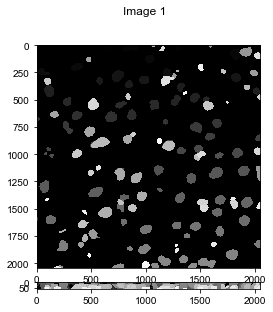

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_27
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_28.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

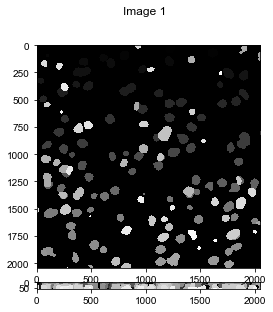

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_28
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_30.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:72 to 112 0.08132033008252063 1.0
--- redo 72
-- overlap found for cell:74 to 142 0.736444298389747 0.4501807955002009
-- overlap found for cell:74 to 143 0.27571475517581334 0.2279891304347826
-- overlap found for cell:75 to 124 0.6878680800942285 0.9931972789115646
--- redo 75
-- overlap found for cell:77 to 81 0.3116041625760848 0.46841794569067297
-- overlap found for cell:79 to 160 0.29711897954695404 0.8344657195799876
-- overlap found for cell:80 to 102 0.10766992309291208 1.0
--- redo 80
-- overlap found for cell:84 to 125 0.14792543595911004 1.0
--- redo 84
-- overlap found for cell:86 to 104 0.01284965034965035 1.0
--- redo 86
-- overlap found for cell:86 to 105 0.40655594405594403 0.8875954198473283
-- overlap found for cell:86 to 113 0.23881118881118882 0.7454297407912688
-- overlap found for cell:87 to 103 0.790126900013945 0.8989370141202602
-- overlap found for cell:87 to 186 0.20401617626551388 1.0
--- redo 87
-- overlap found for cell:87 to 10

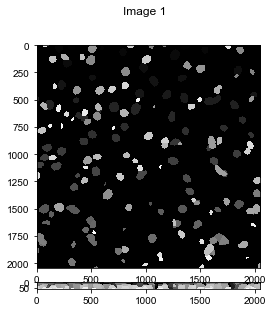

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_30
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_31.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

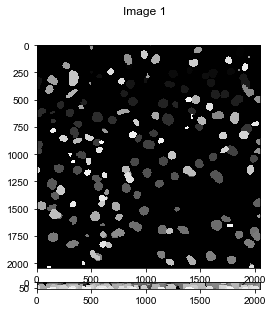

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_31
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_32.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

--- skip 102
-- overlap found for cell:112 to 145 0.010832967354706485 0.014399688655380424
-- overlap found for cell:113 to 147 0.006478209658421673 0.007534246575342466
-- overlap found for cell:117 to 134 1.0 0.05947703563202818
--- skip 117
-- overlap found for cell:118 to 192 0.007040627885503232 0.06347554630593132
-- overlap found for cell:129 to 130 0.019356460532931122 0.019371069182389938
-- overlap found for cell:132 to 142 1.0 0.060557125555106985
--- skip 132
-- overlap found for cell:136 to 184 0.17878353471226704 0.6160903316866619
-- overlap found for cell:138 to 144 0.19577080491132332 0.19069767441860466
-- overlap found for cell:146 to 188 0.03139190523198421 0.02550529355149182
-- overlap found for cell:157 to 169 0.04334038054968287 0.03222425988996594
-- overlap found for cell:175 to 186 1.0 0.402774455871801
--- skip 175
-- overlap found for cell:185 to 188 1.0 0.10603144048764838
--- skip 185
- 171 labels kept.
- finish in 667.73s. 
- reconstruct 60 layers


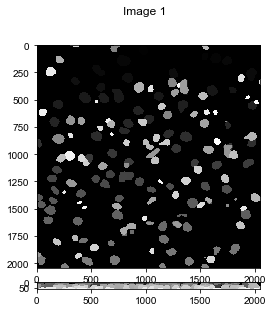

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_32
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_33.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:66 to 82 0.23384300126103405 0.9906510851419031
--- redo 66
-- overlap found for cell:66 to 134 0.020761245674740483 1.0
--- redo 66
-- overlap found for cell:71 to 100 1.0 0.3538354253835425
--- skip 71
-- overlap found for cell:72 to 90 0.14476915520628683 1.0
--- redo 72
-- overlap found for cell:72 to 101 0.981335952848723 0.8545765611633875
--- skip 72
-- overlap found for cell:73 to 102 1.0 0.10614101592115238
--- skip 73
-- overlap found for cell:74 to 119 0.9774609015639374 0.6915066710055321
--- skip 74
-- overlap found for cell:76 to 124 1.0 0.1717062634989201
--- skip 76
-- overlap found for cell:77 to 125 0.8637992831541219 0.4103291713961407
-- overlap found for cell:78 to 126 1.0 0.44223517312307165
--- skip 78
-- overlap found for cell:81 to 111 0.22992700729927007 0.027450980392156862
-- overlap found for cell:83 to 177 0.29998683690930633 0.921552769915083
--- redo 83
-- overlap found for cell:85 to 161 0.18981481481481483 1.0
--- redo 85
-- o

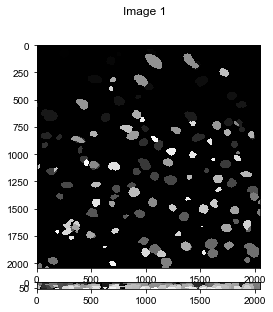

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_33
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_34.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:73 to 171 0.3630769230769231 0.7675339366515838
-- overlap found for cell:75 to 146 0.6887052341597796 0.8116883116883117
-- overlap found for cell:76 to 121 0.25510757548363766 1.0
--- redo 76
-- overlap found for cell:81 to 83 0.04878048780487805 0.1746641074856046
-- overlap found for cell:83 to 101 0.03358925143953935 0.02252252252252252
-- overlap found for cell:85 to 139 0.9667565139263252 0.2537735849056604
--- skip 85
-- overlap found for cell:88 to 107 0.9305343511450381 0.48857715430861726
--- skip 88
-- overlap found for cell:90 to 154 0.8848684210526315 0.1368260427263479
-- overlap found for cell:94 to 131 1.0 0.3952020202020202
--- skip 94
-- overlap found for cell:95 to 133 0.8410351201478743 0.6442934013027471
-- overlap found for cell:96 to 134 1.0 0.11454888993859234
--- skip 96
-- overlap found for cell:97 to 153 0.36646586345381527 0.4112676056338028
-- overlap found for cell:104 to 120 1.0 0.0718132854578097
--- skip 104
-- overlap found f

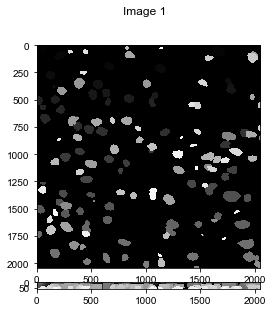

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_34
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_35.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:75 to 104 0.12823305200108903 1.0
--- redo 75
-- overlap found for cell:75 to 105 0.048325619384699155 1.0
--- redo 75
-- overlap found for cell:75 to 112 0.8401851347672202 0.9921234528210898
--- redo 75
-- overlap found for cell:76 to 97 0.9266910190200277 0.5879955242966752
--- skip 76
-- overlap found for cell:78 to 113 0.9828714663695864 0.8812585840928955
--- skip 78
-- overlap found for cell:79 to 114 0.9597135183527306 0.8391389432485323
--- skip 79
-- overlap found for cell:81 to 106 0.14925807390165843 1.0
--- redo 81
-- overlap found for cell:82 to 164 0.03333333333333333 0.0344149459193707
-- overlap found for cell:85 to 116 1.0 0.141735918744229
--- skip 85
-- overlap found for cell:86 to 129 0.18015414258188825 0.01995518087717426
-- overlap found for cell:87 to 152 0.5230288836846214 0.3323412698412698
-- overlap found for cell:94 to 122 0.8438781487990626 0.8832004904966279
-- overlap found for cell:139 to 154 0.2050561797752809 1.0
--- redo 13

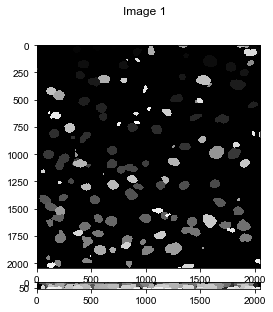

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_35
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_36.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:140 to 172 0.0639673358285131 0.08683602771362586
-- overlap found for cell:150 to 183 0.12899372947148402 1.0
--- redo 150
-- overlap found for cell:153 to 169 1.0 0.12275622466705269
--- skip 153
- 152 labels kept.
- finish in 567.92s. 
- reconstruct 60 layers


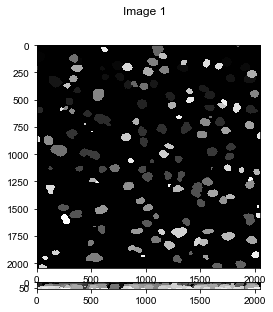

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_36
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_37.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:82 to 148 0.9011987625676721 0.5448275862068965
--- skip 82
-- overlap found for cell:84 to 171 0.1683624496064504 0.22152058600656732
-- overlap found for cell:85 to 150 0.04119193689745837 0.06497695852534562
-- overlap found for cell:85 to 206 0.11758691206543967 0.7344890510948905
-- overlap found for cell:86 to 150 0.8404371584699454 0.7087557603686636
-- overlap found for cell:90 to 121 1.0 0.6141802067946824
--- skip 90
-- overlap found for cell:95 to 178 0.028283271212453408 0.02348871085214858
-- overlap found for cell:97 to 126 1.0 0.4596015495296071
--- skip 97
-- overlap found for cell:99 to 143 1.0 0.27367352119827365
--- skip 99
-- overlap found for cell:100 to 119 0.38238100286229193 0.9966841668969328
--- redo 100
-- overlap found for cell:101 to 159 0.36321303841676367 0.8478260869565217
-- overlap found for cell:103 to 171 0.08880616857218825 0.08436473857034604
-- overlap found for cell:107 to 154 1.0 0.032212317666126415
--- skip 107
-- ove

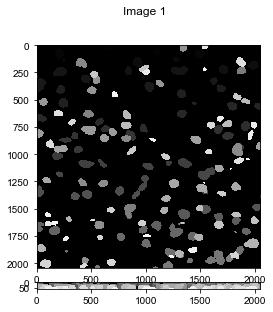

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_37
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_38.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:90 to 127 1.0 0.3259835711197579
--- skip 90
-- overlap found for cell:91 to 129 0.94811753902663 0.3152671755725191
--- skip 91
-- overlap found for cell:99 to 108 0.08949416342412451 1.0
--- redo 99
-- overlap found for cell:99 to 119 0.9933296275708727 0.5175209962351578
--- skip 99
-- overlap found for cell:100 to 120 1.0 0.03922404604561927
--- skip 100
-- overlap found for cell:102 to 122 1.0 0.25705939629990265
--- skip 102
-- overlap found for cell:104 to 124 0.9390642002176278 0.28757080973008997
--- skip 104
-- overlap found for cell:110 to 172 0.6428571428571429 0.07215189873417721
-- overlap found for cell:124 to 173 0.1678115799803729 1.0
--- redo 124
-- overlap found for cell:156 to 164 1.0 0.09082125603864734
--- skip 156
- 157 labels kept.
- finish in 642.22s. 
- reconstruct 60 layers


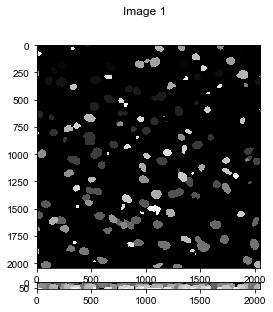

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_38
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_39.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

--- skip 80
-- overlap found for cell:81 to 136 1.0 0.4710770214125919
--- skip 81
-- overlap found for cell:83 to 119 0.8589567604667124 0.8952074391988555
-- overlap found for cell:98 to 128 0.015424164524421594 0.029440628066732092
-- overlap found for cell:100 to 162 0.7127937336814621 0.7604456824512534
-- overlap found for cell:101 to 108 0.3763808222298144 1.0
--- redo 101
-- overlap found for cell:101 to 164 0.2841362031659264 0.962948668467773
--- redo 101
-- overlap found for cell:104 to 115 0.11076382105880055 0.7853185595567868
-- overlap found for cell:110 to 167 0.3834084761045987 1.0
--- redo 110
-- overlap found for cell:113 to 120 1.0 0.07054193157735392
--- skip 113
-- overlap found for cell:117 to 126 1.0 0.07640750670241286
--- skip 117
-- overlap found for cell:121 to 131 0.9556259904912837 0.16511500547645125
--- skip 121
-- overlap found for cell:127 to 137 0.16551967531321687 0.9740394600207685
--- redo 127
-- overlap found for cell:133 to 143 0.0833109379199140

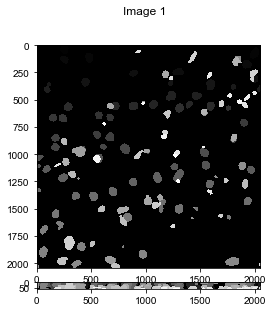

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_39
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_63.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:42 to 366 0.09638448743762584 0.8615023474178404
-- overlap found for cell:42 to 379 0.22953689923837872 1.0
--- redo 42
-- overlap found for cell:42 to 366 0.09638448743762584 0.8615023474178404
-- overlap found for cell:43 to 141 0.003793010024383636 0.004110393423370522
-- overlap found for cell:43 to 325 0.13505824979680303 0.3524213503004595
-- overlap found for cell:43 to 356 0.002844757518287727 0.0070898041863605675
-- overlap found for cell:45 to 142 0.3622850480909356 0.8432835820895522
-- overlap found for cell:46 to 141 0.13208096694335225 0.13314738696418085
-- overlap found for cell:46 to 365 0.07514198339886413 0.19486404833836857
-- overlap found for cell:50 to 220 0.034353529044347283 0.05006827492034593
-- overlap found for cell:50 to 341 0.05059337913803873 0.05472972972972973
-- overlap found for cell:51 to 149 0.2865388579674294 1.0
--- redo 51
-- overlap found for cell:51 to 248 0.23685837971552257 0.2842652152399802
-- overlap found for 

-- overlap found for cell:113 to 254 0.7033898305084746 0.03572965992251399
-- overlap found for cell:114 to 183 1.0 0.09027027027027026
--- skip 114
-- overlap found for cell:115 to 316 0.07028969234224118 0.06270032051282051
-- overlap found for cell:115 to 352 0.06467549966314844 0.06419973250111458
-- overlap found for cell:117 to 185 0.01695692025664528 0.10571428571428572
-- overlap found for cell:117 to 373 0.25458295142071496 0.6227578475336323
-- overlap found for cell:118 to 184 0.6320272572402045 0.1530843820920157
-- overlap found for cell:119 to 316 0.08527493010251631 0.0733173076923077
-- overlap found for cell:121 to 274 0.012051822838204279 0.011160714285714286
-- overlap found for cell:121 to 316 0.3272069900572462 0.21754807692307693
-- overlap found for cell:121 to 333 0.07110575474540524 0.11473018959649976
-- overlap found for cell:122 to 362 0.004830917874396135 0.009295120061967466
-- overlap found for cell:122 to 374 0.13325281803542674 1.0
--- redo 122
-- over

-- overlap found for cell:203 to 354 0.27097661623108665 0.08628996933858958
-- overlap found for cell:205 to 206 0.05449936628643853 0.03096495439270283
-- overlap found for cell:205 to 279 0.11913814955640051 0.07254952405454078
-- overlap found for cell:207 to 208 0.28494041170097506 0.20724980299448384
-- overlap found for cell:207 to 339 0.19230769230769232 0.25195173882185945
-- overlap found for cell:208 to 209 0.004728132387706856 0.00597609561752988
-- overlap found for cell:210 to 213 0.044400396432111 0.030521869464504702
-- overlap found for cell:210 to 324 0.13141724479682854 0.20256645279560037
-- overlap found for cell:213 to 393 0.04210382885951765 0.07818825910931174
-- overlap found for cell:214 to 382 0.030796640366505472 0.04664610639938319
-- overlap found for cell:215 to 356 0.331306990881459 0.11039837947332883
-- overlap found for cell:216 to 281 0.012425868398757414 0.07154471544715447
-- overlap found for cell:216 to 307 0.007907370799209263 0.0088383838383838

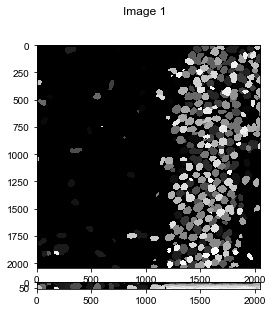

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_63
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_64.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:28 to 369 0.04550530429927415 0.07732447817836813
-- overlap found for cell:28 to 370 0.16610831937465104 0.363026235509457
-- overlap found for cell:29 to 200 1.0 0.21302738712065136
--- skip 29
-- overlap found for cell:30 to 203 1.0 0.13198900091659027
--- skip 30
-- overlap found for cell:31 to 204 0.04442985335959729 0.06138494103416994
-- overlap found for cell:31 to 297 0.10899540380827315 1.0
--- redo 31
-- overlap found for cell:31 to 204 0.04442985335959729 0.06138494103416994
-- overlap found for cell:31 to 317 0.4040271394178157 0.5619482496194825
-- overlap found for cell:31 to 335 0.3355219960604071 0.5187817258883248
-- overlap found for cell:33 to 34 0.02463605823068309 0.034547738693467334
-- overlap found for cell:33 to 126 0.34759238521836505 0.8016528925619835
-- overlap found for cell:33 to 133 0.1496080627099664 0.18864727478113527
-- overlap found for cell:33 to 298 0.07099664053751399 1.0
--- redo 33
-- overlap found for cell:33 to 34 0

-- overlap found for cell:86 to 289 0.22012578616352202 0.23755656108597284
-- overlap found for cell:87 to 174 0.004861955200555652 0.0068509909469048206
-- overlap found for cell:87 to 179 0.01580135440180587 0.03285198555956679
-- overlap found for cell:87 to 360 0.05018232332002084 1.0
--- redo 87
-- overlap found for cell:87 to 174 0.004861955200555652 0.0068509909469048206
-- overlap found for cell:87 to 179 0.01580135440180587 0.03285198555956679
-- overlap found for cell:88 to 89 0.07195571955719557 0.030757097791798107
-- overlap found for cell:88 to 176 0.5392066420664207 0.30642201834862387
-- overlap found for cell:89 to 176 0.013406940063091483 0.01782437745740498
-- overlap found for cell:89 to 181 0.002365930599369085 0.0031520882584712374
-- overlap found for cell:90 to 344 0.013289036544850499 0.009316770186335404
-- overlap found for cell:91 to 290 0.08677494199535962 0.23057953144266338
-- overlap found for cell:91 to 392 0.028306264501160094 0.08579465541490858
-- o

-- overlap found for cell:152 to 303 0.07029026750142288 0.06352880658436214
-- overlap found for cell:152 to 340 0.17131474103585656 0.12830349531116794
-- overlap found for cell:152 to 377 0.04723961297666477 0.05433715220949264
-- overlap found for cell:153 to 340 0.3448275862068966 0.2259164535379369
-- overlap found for cell:153 to 342 0.6031229668184775 0.4662977867203219
-- overlap found for cell:153 to 400 0.003903708523096942 0.008069939475453935
-- overlap found for cell:154 to 157 0.34279705573080965 0.28093760772147536
-- overlap found for cell:154 to 377 0.24395373291272346 0.37970540098199673
-- overlap found for cell:155 to 242 0.003430531732418525 0.0028564627469650082
-- overlap found for cell:155 to 399 0.0465980560320183 0.09731343283582089
-- overlap found for cell:156 to 157 0.03275109170305677 0.01809720785935884
-- overlap found for cell:156 to 341 0.2685589519650655 0.33217592592592593
-- overlap found for cell:156 to 379 0.21023081721771678 0.15412760118911503


-- overlap found for cell:256 to 275 0.0024106066693451184 0.00272789270288702
-- overlap found for cell:258 to 353 0.021922428330522766 0.015640038498556306
-- overlap found for cell:259 to 299 0.7605177993527508 0.3343767785998862
-- overlap found for cell:262 to 389 0.27622097678142515 0.2804878048780488
-- overlap found for cell:267 to 285 1.0 0.11625487646293887
--- skip 267
-- overlap found for cell:269 to 364 0.12349555206698064 0.06310160427807486
-- overlap found for cell:270 to 308 0.025820333512641205 0.022508792497069167
-- overlap found for cell:271 to 329 0.2941961307538359 1.0
--- redo 271
-- overlap found for cell:271 to 365 0.3979319546364243 0.8727139722019019
-- overlap found for cell:272 to 312 0.11773291170031623 0.1434074074074074
-- overlap found for cell:277 to 339 0.10850052798310454 0.11205016357688113
-- overlap found for cell:279 to 324 0.0323498044792037 0.024004220522289635
-- overlap found for cell:295 to 347 0.146813780680027 0.8380462724935732
-- overla

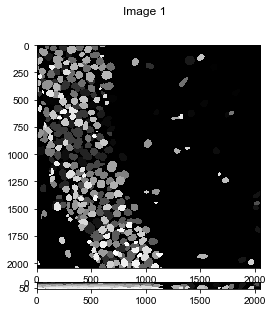

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_64
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_66.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:76 to 81 1.0 0.09463276836158192
--- skip 76
-- overlap found for cell:78 to 80 0.12098765432098765 0.017537580529706515
-- overlap found for cell:78 to 145 0.11481481481481481 0.04501452081316554
-- overlap found for cell:79 to 111 0.06621160409556313 0.17880184331797236
-- overlap found for cell:81 to 131 0.062146892655367235 0.08297972654408298
-- overlap found for cell:83 to 94 0.2751699579151829 0.18595493327499454
-- overlap found for cell:89 to 120 0.11444141689373297 0.2441860465116279
-- overlap found for cell:89 to 138 0.2670299727520436 0.04476930105070809
-- overlap found for cell:92 to 125 0.18084319526627218 0.2287719298245614
-- overlap found for cell:97 to 117 0.19728915662650603 0.16216885367665262
-- overlap found for cell:98 to 118 0.19806517311608962 0.041198898538445244
-- overlap found for cell:98 to 119 0.23727087576374745 0.1346431667148223
-- overlap found for cell:102 to 108 0.026470588235294117 0.03073170731707317
-- overlap found fo

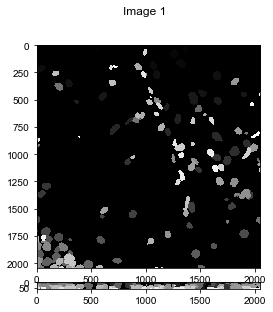

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_66
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_67.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:33 to 341 0.2505302557704304 0.4681743996269527
-- overlap found for cell:33 to 388 0.1157829070492826 0.35706040784917276
-- overlap found for cell:34 to 154 1.0 0.03091286307053942
--- skip 34
-- overlap found for cell:35 to 157 0.15377268385864373 0.6927710843373494
-- overlap found for cell:35 to 261 0.1069723018147087 0.12612612612612611
-- overlap found for cell:35 to 298 0.044890162368672396 0.13726635514018692
-- overlap found for cell:35 to 341 0.015472779369627506 0.018885521100489626
-- overlap found for cell:36 to 38 0.14438789177605144 0.1613048032320814
-- overlap found for cell:36 to 323 0.01982319849986606 0.02630643441166015
-- overlap found for cell:36 to 342 0.0320117867666756 1.0
--- redo 36
-- overlap found for cell:36 to 38 0.14438789177605144 0.1613048032320814
-- overlap found for cell:36 to 323 0.01982319849986606 0.02630643441166015
-- overlap found for cell:36 to 416 0.0021430484864720066 0.004955094456488077
-- overlap found for cel

-- overlap found for cell:79 to 323 0.15846994535519127 0.07216494845360824
-- overlap found for cell:79 to 462 0.10421545667447307 0.12552891396332863
-- overlap found for cell:80 to 158 0.004282842408880343 0.020895522388059702
-- overlap found for cell:80 to 160 0.25705794947994054 0.6445321060705677
-- overlap found for cell:80 to 464 0.3574862337208286 0.8678124336940378
-- overlap found for cell:83 to 159 1.0 0.12748091603053435
--- skip 83
-- overlap found for cell:84 to 85 0.0077276908923643054 0.0068796068796068794
-- overlap found for cell:84 to 159 0.0038638454461821527 0.00801526717557252
-- overlap found for cell:84 to 420 0.7536338546458141 0.7113581104550191
-- overlap found for cell:85 to 162 0.009991809991809993 0.012613730355665839
-- overlap found for cell:85 to 395 0.2986076986076986 0.396304347826087
-- overlap found for cell:85 to 420 0.0095004095004095 0.010072941993747829
-- overlap found for cell:85 to 466 0.14627354627354627 0.2315270935960591
-- overlap found

-- overlap found for cell:136 to 335 0.12114233072316904 0.05423798721385853
-- overlap found for cell:138 to 143 0.00989522700814901 0.0155203895313451
-- overlap found for cell:138 to 411 0.24369421808304229 0.3064909712054661
-- overlap found for cell:139 to 221 0.017559577136713852 0.0363232023721275
-- overlap found for cell:139 to 257 0.03816520336857194 0.03966480446927374
-- overlap found for cell:139 to 385 0.07686794481275758 0.08624849215922799
-- overlap found for cell:139 to 436 0.186884070955026 0.29698177676537585
-- overlap found for cell:140 to 319 1.0 0.16923076923076924
--- skip 140
-- overlap found for cell:141 to 223 0.019387949059114236 0.02103960396039604
-- overlap found for cell:141 to 292 0.004751948298802509 0.005260942760942761
-- overlap found for cell:141 to 362 0.013685611100551226 0.018609459808736108
-- overlap found for cell:141 to 413 0.7838813913704619 0.8593456970202126
-- overlap found for cell:142 to 223 0.012741046831955923 0.007632013201320132
-

-- overlap found for cell:209 to 430 0.4690566793510915 0.3771943952327267
-- overlap found for cell:211 to 288 0.005908419497784343 0.003029155622870125
-- overlap found for cell:211 to 430 0.6938700147710487 0.3026252214527299
-- overlap found for cell:212 to 288 1.0 0.21999242711094283
--- skip 212
-- overlap found for cell:213 to 383 0.14225437010247136 0.08293797223686522
-- overlap found for cell:213 to 432 0.2848101265822785 0.2390589425752593
-- overlap found for cell:214 to 252 1.0 0.12339247924466873
--- skip 214
-- overlap found for cell:216 to 218 0.31960752774650153 0.7835173501577287
-- overlap found for cell:216 to 385 0.031848158275695676 0.039806996381182146
-- overlap found for cell:216 to 432 0.05517130448769503 0.08676954211990894
-- overlap found for cell:218 to 385 0.08280757097791798 0.04221954161640531
-- overlap found for cell:219 to 337 0.05693069306930693 0.08407798537774168
-- overlap found for cell:219 to 410 0.21177117711771176 0.21532438478747204
-- overl

-- overlap found for cell:318 to 319 0.008583690987124463 0.008791208791208791
-- overlap found for cell:319 to 339 0.025745682888540032 0.016565656565656565
-- overlap found for cell:319 to 436 0.13124018838304552 0.11902050113895217
-- overlap found for cell:320 to 437 0.1001727115716753 0.14208721215090642
-- overlap found for cell:320 to 439 0.1070811744386874 1.0
--- redo 320
-- overlap found for cell:320 to 437 0.1001727115716753 0.14208721215090642
-- overlap found for cell:322 to 415 0.5799142682180036 0.85623869801085
-- overlap found for cell:326 to 349 0.9556962025316456 0.24575680074401302
--- skip 326
-- overlap found for cell:327 to 354 1.0 0.09105082631743062
--- skip 327
-- overlap found for cell:329 to 479 0.003185558800106185 0.005905511811023622
-- overlap found for cell:333 to 334 0.02664298401420959 0.021658912241296326
-- overlap found for cell:333 to 430 0.08565225971975528 0.06989853438556934
-- overlap found for cell:334 to 381 0.032568586555430774 0.0683501683

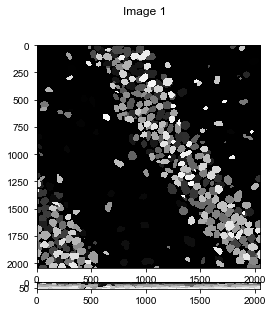

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_67
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_68.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:50 to 254 0.3247422680412371 0.9531914893617022
--- redo 50
-- overlap found for cell:51 to 52 0.007251631617113851 0.00732243104710764
-- overlap found for cell:51 to 108 0.12883732173072274 0.06811501597444089
-- overlap found for cell:51 to 316 0.11360889533478366 0.11388417736854858
-- overlap found for cell:52 to 170 0.04491091042226019 0.05400645729380687
-- overlap found for cell:52 to 196 0.2806931901391262 0.26053466243769824
-- overlap found for cell:53 to 257 0.1453698913605794 0.12073039742212674
-- overlap found for cell:53 to 303 0.06570098292809105 0.07692307692307693
-- overlap found for cell:54 to 302 0.5819548872180451 0.726078799249531
-- overlap found for cell:55 to 172 0.12194747350637383 0.13443955299695226
-- overlap found for cell:55 to 258 0.38596221778528644 0.6590611067400997
-- overlap found for cell:55 to 259 0.09829519275072954 0.2050624799743672
-- overlap found for cell:56 to 114 0.04455179817498658 0.03617083091226032
-- overla

-- overlap found for cell:101 to 301 0.053449347420758235 0.07539450613676213
-- overlap found for cell:101 to 316 0.19846695670188522 0.2321298764235522
-- overlap found for cell:102 to 301 0.2648891966759003 0.22355347749853888
-- overlap found for cell:102 to 338 0.41412742382271467 0.7878787878787878
-- overlap found for cell:103 to 105 0.01867164577220592 0.07675438596491228
-- overlap found for cell:103 to 194 0.3857028540944252 0.2234239802224969
-- overlap found for cell:104 to 108 0.010707456978967494 0.007156549520766773
-- overlap found for cell:104 to 195 0.004588910133843212 0.02810304449648712
-- overlap found for cell:104 to 227 0.012045889101338431 0.03420195439739414
-- overlap found for cell:104 to 257 0.11778202676864245 0.13233082706766916
-- overlap found for cell:105 to 194 0.06359649122807018 0.00896168108776267
-- overlap found for cell:106 to 285 0.18657421998109044 0.3099476439790576
-- overlap found for cell:107 to 194 0.027803521779425393 0.00463535228677379

-- overlap found for cell:154 to 312 0.040261382799325465 0.1857976653696498
-- overlap found for cell:154 to 332 0.012225969645868466 0.023731587561374796
-- overlap found for cell:155 to 296 0.025798525798525797 0.011217948717948718
-- overlap found for cell:156 to 296 0.06372311175804625 0.10523504273504274
-- overlap found for cell:157 to 219 0.015584415584415584 0.004527162977867203
-- overlap found for cell:159 to 190 1.0 0.08333333333333333
--- skip 159
-- overlap found for cell:160 to 222 0.024196221411998675 0.13619402985074627
-- overlap found for cell:162 to 333 0.4295665634674923 0.6371986222732492
-- overlap found for cell:163 to 164 0.014238494787693873 0.01987930422435215
-- overlap found for cell:164 to 297 0.6173233936812211 0.3420535011801731
-- overlap found for cell:165 to 249 0.11893617021276595 0.17205293936595875
-- overlap found for cell:166 to 225 0.10975609756097561 1.0
--- redo 166
-- overlap found for cell:166 to 298 0.06097560975609756 0.03197320341047503
-

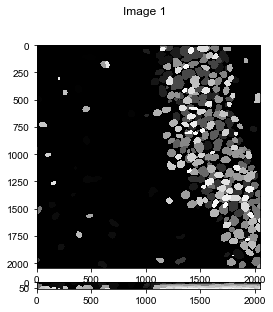

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_68
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_70.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

-- overlap found for cell:34 to 233 0.012078510317060896 0.07643312101910828
-- overlap found for cell:34 to 235 1.0 0.38605012628715757
--- skip 34
-- overlap found for cell:35 to 261 0.12371816076744956 0.11326468806783767
-- overlap found for cell:38 to 98 0.020693410782356144 0.022007722007722007
-- overlap found for cell:38 to 331 0.2586676347794518 1.0
--- redo 38
-- overlap found for cell:38 to 98 0.020693410782356144 0.022007722007722007
-- overlap found for cell:38 to 365 0.0038119440914866584 0.01002865329512894
-- overlap found for cell:38 to 378 0.16699945543655836 1.0
--- redo 38
-- overlap found for cell:38 to 98 0.020693410782356144 0.022007722007722007
-- overlap found for cell:38 to 365 0.0038119440914866584 0.01002865329512894
-- overlap found for cell:39 to 196 1.0 0.4140316205533597
--- skip 39
-- overlap found for cell:40 to 102 1.0 0.06005719733079123
--- skip 40
-- overlap found for cell:41 to 145 1.0 0.0767067246228586
--- skip 41
-- overlap found for cell:43 to

-- overlap found for cell:105 to 238 1.0 0.11898989898989899
--- skip 105
-- overlap found for cell:106 to 153 0.19121756487025948 0.09987489574645537
-- overlap found for cell:107 to 108 0.11642444131895609 0.07195981841012267
-- overlap found for cell:107 to 305 0.038287232380059384 0.20780322307039864
-- overlap found for cell:108 to 153 0.08953926398145465 0.09664303586321935
-- overlap found for cell:108 to 155 0.08026658939437845 0.1637761135199054
-- overlap found for cell:108 to 305 0.1138800347725297 1.0
--- redo 108
-- overlap found for cell:108 to 153 0.08953926398145465 0.09664303586321935
-- overlap found for cell:108 to 155 0.08026658939437845 0.1637761135199054
-- overlap found for cell:111 to 158 0.006754289886820007 0.00597834868314752
-- overlap found for cell:111 to 271 0.04308141657539248 0.051104374187960155
-- overlap found for cell:111 to 386 0.10569550930996714 1.0
--- redo 111
-- overlap found for cell:111 to 158 0.006754289886820007 0.00597834868314752
-- over

-- overlap found for cell:181 to 312 0.0040747028862478775 0.0032537960954446853
-- overlap found for cell:186 to 228 1.0 0.07243589743589744
--- skip 186
-- overlap found for cell:188 to 284 0.45916890634690927 0.22730529116774129
-- overlap found for cell:189 to 362 0.007621247113163972 0.008638743455497382
-- overlap found for cell:190 to 191 0.05550883095037847 0.06432748538011696
-- overlap found for cell:191 to 330 0.2324561403508772 0.20122337059692047
-- overlap found for cell:191 to 362 0.06725146198830409 0.07225130890052356
-- overlap found for cell:195 to 330 0.1776760409853935 0.17190466146382619
-- overlap found for cell:197 to 316 0.05069124423963134 0.10858835143139191
-- overlap found for cell:198 to 379 0.031219191587249426 1.0
--- redo 198
-- overlap found for cell:198 to 393 0.1743345382845876 1.0
--- redo 198
-- overlap found for cell:199 to 380 0.06434213061067232 1.0
--- redo 199
-- overlap found for cell:201 to 366 0.18306244653550044 0.38698010849909587
-- over

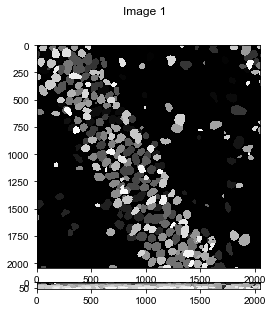

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_70
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_83.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

- 112 labels kept.
- finish in 356.02s. 
- reconstruct 60 layers


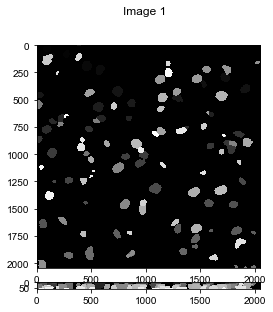

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_83
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_84.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

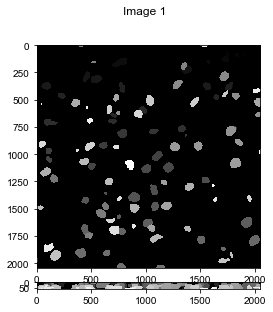

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_84
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_85.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

--- skip 110
- 103 labels kept.
- finish in 327.68s. 
- reconstruct 60 layers


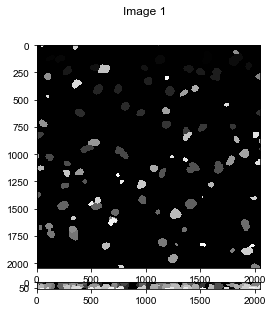

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_85
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_86.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

- 116 labels kept.
- finish in 376.41s. 
- reconstruct 60 layers


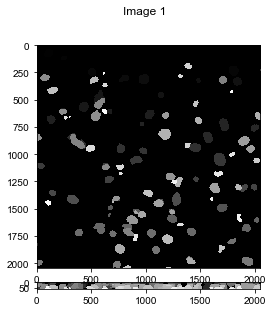

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_86
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_87.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

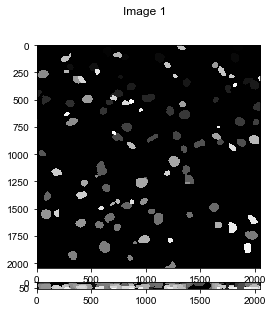

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_87
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_88.hdf5
try loading: color_dic
try loading: drift
try loading: rotation
try loading: shared_pa

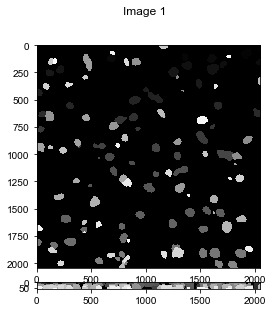

** \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_88


In [5]:
%matplotlib inline
overwrite = True

for _fov_id in fov_ids:
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=True,
                                          _save_info_to_file=False,
                                          )
    
    fov.ref_filename = os.path.join(fov.annotated_folders[0], fov.fov_name)
    dapi_im = fov._load_dapi_image(_dapi_id=0, _overwrite=True, _save=False)
    
    new_full_mask = segmentation_tools.cell.Cellpose_Segmentation(fov.dapi_im).run()
    
    visual_tools.imshow_mark_3d_v2([new_full_mask])
    segmentation_savefile = os.path.join(save_folder, os.path.basename(fov.save_filename).replace('.hdf5', ""))
    
    
    if not os.path.exists(segmentation_savefile) or overwrite:
        print("**",segmentation_savefile)
        np.save(segmentation_savefile, new_full_mask)

In [26]:
from ImageAnalysis3 import _image_size
def partition_spots_by_segmentation(spots:np.ndarray, 
                                    seg_mask:np.ndarray,
                                    search_radius=5,
                                    single_im_size=_image_size,
                                    partition_fraction=0.75,
                                    ):
    
    """"""
    _spot_flags = []
    for _spot in spots:
        _crop = io_tools.crop.generate_neighboring_crop(
            _spot[1:4], crop_size=search_radius, 
            single_im_size=single_im_size,
            sub_pixel_precision=False,
        )
        
        
        matches, counts = np.unique(seg_mask[_crop], return_counts=True)
        matched_cells, counts = matches[matches > 0], counts[matches > 0]
        
        if len(matched_cells) == 0:
            # no match
            _spot_flags.append(0)
            continue
        elif len(matched_cells) == 1:
            # all of labels are from one cell
            _spot_flags.append(matched_cells[0])
        else:
            if np.max(counts) / np.sum(seg_mask[_crop]>0) > partition_fraction:
                # majority of labels are from one cell
                #print(matched_cells[np.argmax(counts)])
                _spot_flags.append(matched_cells[np.argmax(counts)])
            else:
                #print("**", matched_cells[np.argmax(counts)], len(matched_cells), np.max(counts) / np.sum(seg_mask[_crop]>0) )
                _spot_flags.append(0)
                
    return np.array(_spot_flags, dtype=np.int32)

for _fov_id in fov_ids[2:]:
    
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False,
                                          )
    

    segmentation_file = os.path.join(fov.segmentation_folder, fov.fov_name.replace('.dax', '.npy'))
    rna_count_file = os.path.join(fov.segmentation_folder, fov.fov_name.replace('.dax', '_spot_count.pkl'))
    if os.path.exists(rna_count_file):
        continue
        
    seg_mask = np.load(segmentation_file)
    fov._load_from_file('rna')
    spot_ids = []
    count_dict = {'cell_ids':{}, 'counts':{}}
    for _rna_id, _spots in zip(fov.rna_ids, fov.rna_spots_list):
        _spot_cell_ids = partition_spots_by_segmentation(_spots, seg_mask, search_radius=50,
                                        single_im_size=fov.shared_parameters['single_im_size'])
        spot_ids.append(_spot_cell_ids)
        _cells, _counts = np.unique(_spot_cell_ids, return_counts=True)
        count_dict['cell_ids'][_rna_id] = _cells
        count_dict['counts'][_rna_id] = _counts

    pickle.dump(count_dict, 
                open(rna_count_file, 'wb')
               )


Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_03.hdf5
try loading: cand_chrom_coords_alt
try loading: gene_chrom_dict
try loading: spot_intensity_th
++ base attributes loaded:['align_drift', 'align_transformation', 'bead_channel

E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1620: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_04.hdf5
try loading: cand_chrom_coords_alt
try loading: spot_intensity_th
++ base attributes loaded:['align_drift', 'align_transformation', 'bead_channel_index', 'cand_chrom_coords_a

++ base attributes loaded:['align_drift', 'align_transformation', 'combo_ref_im', 'dapi_im', 'gene_ref_im', 'registered_im', 'rna_ref_im'] in 14.037s.
+ loading correction from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_12.hdf5
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_12.hdf5
++ base attributes loaded:[] in 0.005s.
+ loading rna from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_12.hdf5
++ finish loading rna in 0.082s. 
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: 

++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_17.hdf5
++ base attributes loaded:[] in 0.005s.
+ loading rna from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_17.hdf5
++ finish loading rna in 0.046s. 
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18

+ loading rna from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_24.hdf5
++ finish loading rna in 0.046s. 
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_25.hdf5
++ base attributes loaded:['align_

++ base attributes loaded:['align_drift', 'align_transformation', 'combo_ref_im', 'dapi_im', 'gene_ref_im', 'registered_im', 'rna_ref_im'] in 14.305s.
+ loading correction from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_31.hdf5
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_31.hdf5
++ base attributes loaded:[] in 0.005s.
+ loading rna from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_31.hdf5
++ finish loading rna in 0.060s. 
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: 

++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_36.hdf5
++ base attributes loaded:[] in 0.006s.
+ loading rna from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_36.hdf5
++ finish loading rna in 0.063s. 
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18

+ loading rna from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_64.hdf5
++ finish loading rna in 0.052s. 
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_66.hdf5
++ base attributes loaded:['align_

++ base attributes loaded:['3e933d49bedc4c9ebd904514cafc1080', 'align_drift', 'align_transformation', 'bead_channel_index', 'combo_ref_im', 'dapi_im', 'gene_ref_im', 'registered_im', 'rna_ref_im'] in 17.677s.
+ loading correction from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_84.hdf5
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_84.hdf5
++ base attributes loaded:[] in 0.006s.
+ loading rna from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_84.hdf5
++ finish loading rna in 0.044s. 
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_

In [27]:
count_dict

{'cell_ids': {1: array([  0,   3,   4,   7,   8,   9,  11,  12,  13,  14,  17,  18,  20,
          21,  24,  25,  26,  27,  28,  29,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  51,  52,
          53,  54,  55,  57,  58,  59,  60,  63,  64,  66,  67,  69,  70,
          71,  72,  73,  74,  75,  76,  78,  79,  80,  81,  83,  84,  85,
          86,  87,  89,  90,  92,  93,  94,  96,  97,  98,  99, 101, 102,
         103, 104, 105, 108, 109, 110, 114, 115, 116, 118, 121, 122, 123,
         124, 126]),
  2: array([  0,   5,   7,   8,   9,  11,  13,  18,  21,  25,  33,  35,  36,
          38,  41,  42,  43,  44,  45,  47,  48,  49,  53,  54,  55,  57,
          59,  63,  69,  71,  72,  76,  80,  81,  83,  86,  87,  89,  97,
         103, 105, 110, 113, 114, 122]),
  3: array([  0,   4,   5,   7,   8,   9,  11,  13,  18,  25,  33,  35,  36,
          42,  43,  44,  45,  47,  48,  49,  50,  54,  55,  57,  59,  69,
          72,  73,  74,  75, 

In [23]:
%matplotlib inline
overwrite = False

for _fov_id in fov_ids[2:]:
    
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False,
                                          )
    
    fov.ref_filename = os.path.join(fov.annotated_folders[0], fov.fov_name)
    fov.rna_ref_id = 0

    # entirely referesh RNA info
    with h5py.File(fov.save_filename, "a", libver='latest') as _f:
        del(_f['rna'])
    fov._save_to_file('rna')
    
    # process image into spots
    fov._process_image_to_spots('rna', 
                                #_sel_ids=np.arange(1,21),
                                _load_common_reference=True,
                                _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=True, 
                                _fit_spots=False,
                                _overwrite_drift=overwrite,
                                _overwrite_image=overwrite,
                                _overwrite_spot=False,
                                _verbose=True)

    print("**", fov.save_filename)

    with h5py.File(fov.save_filename, "a", libver='latest') as _f:
        _grp = _f['rna']
        rna_ims = _grp['ims'][:]
        rna_ids = _grp['ids'][:]
        print(rna_ids)
        if 'spots' in _grp:
            print(_grp['spots'][:].shape)
            _existing_spots = _grp['spots'][:]
            _existing_flags = np.array([(_spots>0).sum() > 0 for _spots in _existing_spots])
            print(_existing_flags)
            if _existing_flags.any():
                print(f"spots exist, skip")
                continue

    #
    from scipy.ndimage.filters import maximum_filter,minimum_filter,gaussian_filter


    decon_ims = []
    decon_spots = []

    for _im in rna_ims:
        _decon_im = correction_tools.deconvolution.gaussian_deconvolution(
            _im, gfilt_size=2, niter=1,
        )
        _spots = ia.spot_tools.fitting.fit_fov_image(_decon_im, '647', max_num_seeds=-1, 
                                                     th_seed=0.12,
                                                        fitting_args={'init_w':2, 'max_w':3})

        decon_ims.append(_decon_im)
        decon_spots.append(_spots)

    with h5py.File(fov.save_filename, "a", libver='latest') as _f:
        _grp = _f['rna']
        rna_ids = _grp['ids'][:]

        if 'spots' not in _grp:
            _spot_dataset = _grp.create_dataset('spots', 
                                                [len(rna_ids), max([len(_spots) for _spots in decon_spots]), 11], 
                                                dtype=np.float)
        else:
            
            _spot_dataset = _grp['spots']
            if _spot_dataset[:].shape[1] < max([len(_spots) for _spots in decon_spots]):
                print(f'spot_dataset not large enough, {_spot_dataset[:].shape[1]}, {max([len(_spots) for _spots in decon_spots])}')
                del(_grp['spots'])
                # re-create
                _spot_dataset = _grp.create_dataset('spots', 
                                                    [len(rna_ids), max([len(_spots) for _spots in decon_spots]), 11], 
                                                    dtype=np.float)
        # fov.save fitted spots
        for _i, (_id, _decon_spots) in enumerate(zip(rna_ids, decon_spots)):
            _spot_dataset[_i, :len(_decon_spots), :] = _decon_spots
            


Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according to color-usage annotation.
+ loading fov_info from file: \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_03.hdf5
try loading: cand_chrom_coords_alt
try loading: gene_chrom_dict
try loading: spot_intensity_th
++ base attributes loaded:['align_drift', 'align_transformation', 'bead_channel

[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 3372 seeded, 3370 fitted in 396.980s.
-- start fitting spots in channel:647, 652 seeded, 652 fitted in 174.575s.
-- start fitting spots in channel:647, 353 seeded, 353 fitted in 117.626s.
spot_dataset not large enough, 2000, 3370
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H16C10', 'H37GNkx750', 'H38GSst750Cnd647', 'H39GS177S326'])
- 36 folders are found according t

++ processing rna ids: [1 2 3] , finish in 293.90s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_06.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 6499 seeded, 6499 fitted in 485.008s.
-- start fitting spots in channel:647, 874 seeded, 874 fitted in 157.384s.
-- start fitting spots in channel:647, 581 seeded, 581 fitted in 104.234s.
spot_dataset not large enough, 2000, 6499
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11

++ processing rna ids: [1 2 3] , finish in 298.82s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_11.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 8005 seeded, 8005 fitted in 311.388s.
-- start fitting spots in channel:647, 444 seeded, 444 fitted in 130.180s.
-- start fitting spots in channel:647, 168 seeded, 168 fitted in 107.164s.
spot_dataset not large enough, 2000, 8005
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11

++ processing rna ids: [1 2 3] , finish in 301.52s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_13.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 8605 seeded, 8605 fitted in 793.142s.
-- start fitting spots in channel:647, 546 seeded, 546 fitted in 164.653s.
-- start fitting spots in channel:647, 274 seeded, 274 fitted in 115.467s.
spot_dataset not large enough, 2000, 8605
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11

++ processing rna ids: [1 2 3] , finish in 291.87s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_15.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 7660 seeded, 7660 fitted in 415.247s.
-- start fitting spots in channel:647, 679 seeded, 679 fitted in 152.279s.
-- start fitting spots in channel:647, 364 seeded, 364 fitted in 100.427s.
spot_dataset not large enough, 2000, 7660
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11

++ processing rna ids: [1 2 3] , finish in 291.15s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_17.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 7320 seeded, 7320 fitted in 312.509s.
-- start fitting spots in channel:647, 518 seeded, 518 fitted in 132.733s.
-- start fitting spots in channel:647, 203 seeded, 203 fitted in 91.214s.
spot_dataset not large enough, 2000, 7320
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C

++ processing rna ids: [1 2 3] , finish in 299.44s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_21.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 9655 seeded, 9655 fitted in 392.550s.
-- start fitting spots in channel:647, 606 seeded, 606 fitted in 159.713s.
-- start fitting spots in channel:647, 258 seeded, 258 fitted in 107.403s.
spot_dataset not large enough, 2000, 9655
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11

++ processing rna ids: [1 2 3] , finish in 301.44s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_23.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 7914 seeded, 7914 fitted in 380.980s.
-- start fitting spots in channel:647, 614 seeded, 614 fitted in 147.272s.
-- start fitting spots in channel:647, 260 seeded, 259 fitted in 94.730s.
spot_dataset not large enough, 2000, 7914
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C

++ processing rna ids: [1 2 3] , finish in 301.63s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_25.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 14224 seeded, 14222 fitted in 1888.176s.
-- start fitting spots in channel:647, 434 seeded, 434 fitted in 140.375s.
-- start fitting spots in channel:647, 280 seeded, 280 fitted in 93.303s.
spot_dataset not large enough, 2000, 14222
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', '

++ processing rna ids: [1 2 3] , finish in 297.31s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_27.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 8230 seeded, 8230 fitted in 536.464s.
-- start fitting spots in channel:647, 566 seeded, 566 fitted in 146.606s.
-- start fitting spots in channel:647, 188 seeded, 188 fitted in 112.795s.
spot_dataset not large enough, 2000, 8230
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11

++ processing rna ids: [1 2 3] , finish in 353.25s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_30.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 4075 seeded, 4075 fitted in 232.267s.
-- start fitting spots in channel:647, 222 seeded, 222 fitted in 139.978s.
-- start fitting spots in channel:647, 162 seeded, 162 fitted in 110.318s.
spot_dataset not large enough, 2000, 4075
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11

++ processing rna ids: [1 2 3] , finish in 306.92s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_32.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 8187 seeded, 8187 fitted in 394.229s.
-- start fitting spots in channel:647, 366 seeded, 366 fitted in 126.595s.
-- start fitting spots in channel:647, 232 seeded, 232 fitted in 110.263s.
spot_dataset not large enough, 2000, 8187
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11

++ processing rna ids: [1 2 3] , finish in 299.09s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_34.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 15710 seeded, 15700 fitted in 2540.516s.
-- start fitting spots in channel:647, 2037 seeded, 2037 fitted in 473.491s.
-- start fitting spots in channel:647, 318 seeded, 318 fitted in 103.469s.
spot_dataset not large enough, 2000, 15700
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4'

++ processing rna ids: [1 2 3] , finish in 304.17s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_36.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 6152 seeded, 6152 fitted in 325.518s.
-- start fitting spots in channel:647, 233 seeded, 233 fitted in 126.137s.
-- start fitting spots in channel:647, 212 seeded, 212 fitted in 107.200s.
spot_dataset not large enough, 2000, 6152
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11

++ processing rna ids: [1 2 3] , finish in 350.50s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_38.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 3820 seeded, 3820 fitted in 284.181s.
-- start fitting spots in channel:647, 229 seeded, 229 fitted in 125.326s.
-- start fitting spots in channel:647, 189 seeded, 189 fitted in 104.508s.
spot_dataset not large enough, 2000, 3820
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11

++ processing rna ids: [1 2 3] , finish in 305.42s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_63.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 11189 seeded, 11189 fitted in 372.893s.
-- start fitting spots in channel:647, 185 seeded, 185 fitted in 119.499s.
-- start fitting spots in channel:647, 62 seeded, 62 fitted in 104.518s.
spot_dataset not large enough, 2000, 11189
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H1

++ processing rna ids: [1 2 3] , finish in 355.11s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_66.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 1931 seeded, 1931 fitted in 163.466s.
-- start fitting spots in channel:647, 136 seeded, 136 fitted in 116.869s.
-- start fitting spots in channel:647, 71 seeded, 71 fitted in 110.390s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', 'H1

++ processing rna ids: [1 2 3] , finish in 350.99s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_68.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 8016 seeded, 8016 fitted in 286.622s.
-- start fitting spots in channel:647, 185 seeded, 185 fitted in 125.210s.
-- start fitting spots in channel:647, 50 seeded, 50 fitted in 109.285s.
spot_dataset not large enough, 2000, 8016
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5

++ processing rna ids: [1 2 3] , finish in 312.14s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_83.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 2555 seeded, 2555 fitted in 168.202s.
-- start fitting spots in channel:647, 356 seeded, 356 fitted in 121.648s.
-- start fitting spots in channel:647, 252 seeded, 252 fitted in 100.734s.
spot_dataset not large enough, 2000, 2555
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11

++ processing rna ids: [1 2 3] , finish in 342.93s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_85.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 1302 seeded, 1302 fitted in 180.781s.
-- start fitting spots in channel:647, 237 seeded, 237 fitted in 128.453s.
-- start fitting spots in channel:647, 141 seeded, 141 fitted in 100.873s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C5', 'H12C6', 'H13C7', 'H14C8', 'H15C9', '

++ processing rna ids: [1 2 3] , finish in 306.39s.
** \\10.245.74.40\Turing1.5\Pu\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_87.hdf5
[1 2 3]
(3, 2000, 11)
[False False False]
-- start fitting spots in channel:647, 2186 seeded, 2186 fitted in 174.579s.
-- start fitting spots in channel:647, 205 seeded, 205 fitted in 114.833s.
-- start fitting spots in channel:647, 182 seeded, 182 fitted in 94.533s.
spot_dataset not large enough, 2000, 2186
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 39
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H7C1', 'H8C2', 'H27C21', 'H28C22', 'H29C23', 'H30C24', 'H31C25', 'H32C26', 'H33C27', 'H34C28', 'H35C29', 'H36C30', 'H17C11', 'H18C12', 'H19C13', 'H20C14', 'H21C15', 'H22C16', 'H23C17', 'H24C18', 'H25C19', 'H26C20', 'H9C3', 'H10C4', 'H11C

In [19]:
with h5py.File(fov.save_filename, "a", libver='latest') as _f:
    _grp = _f['rna']
    print(_grp['spots'][:].shape)

(3, 3885, 11)


In [54]:
with h5py.File(fov.save_filename, "a", libver='latest') as _f:
    _grp = _f['rna']
    rna_ids = _grp['ids'][:]

    if 'spots' not in _grp:
        _spot_dataset = _grp.create_dataset('spots', 
                                            [len(rna_ids), 10000, 11], 
                                            dtype=np.float)


In [49]:
_fl = files[2]

save_filename = os.path.join(hdf5_folder, _fl)
print("**", save_filename)

with h5py.File(save_filename, "a", libver='latest') as _f:
    _grp = _f['rna']
    rna_ims = _grp['ims'][:]
    rna_ids = _grp['ids'][:]

** \\10.245.74.40\Turing3\Pu\Analyzed_Data\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_03.hdf5


In [50]:
rna_ims

array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        ...,

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
    

In [46]:
%time



Wall time: 0 ns
** \\10.245.74.40\Turing3\Pu\Analyzed_Data\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_00.hdf5
[1 2 2]
(3, 2000, 11)
[False False False]
clear existing spots dataset


E:\Users\puzheng\Documents\ImageAnalysis3\correction_tools\deconvolution.py:9: RuntimeWarning: invalid value encountered in true_divide
  decon_im = decon_im / gaussian_filter(decon_im, gfilt_size)


-- start fitting spots in channel:647, 0 seeded, 

AttributeError: 'iter_fit_seed_points' object has no attribute 'im_subtr'

[1 2 3]
(3, 10000, 11)
[ True  True  True]


In [35]:
?_grp.create_dataset

In [33]:
plt.close('all')

<IPython.core.display.Javascript object>


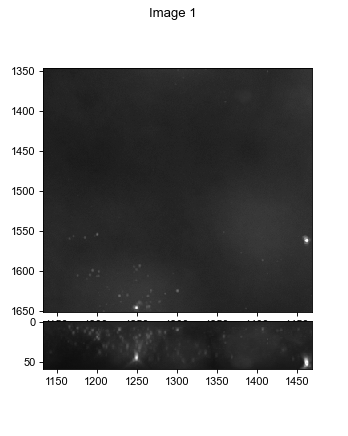

In [34]:
%matplotlib notebook
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(rna_ims)

<IPython.core.display.Javascript object>


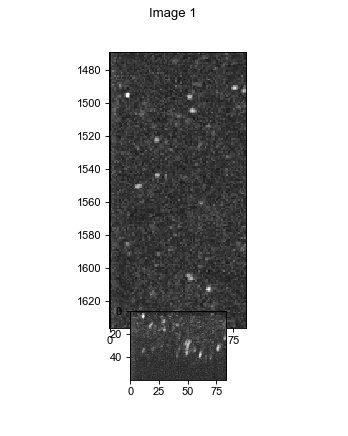

In [36]:
visual_tools.imshow_mark_3d_v2(decon_ims, min_max_default=[1,1.2],)

In [17]:
## visualize
%matplotlib notebook
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(decon_spots):
    _sel_spots = _spots
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(decon_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               min_max_default=[1,1.1],
                               )
plt.show()

<IPython.core.display.Javascript object>

## 2. Process image into candidate spots

In [148]:
fov.ref_filename = os.path.join(fov.annotated_folders[0], fov.fov_name)
dapi_im = fov._load_dapi_image(_dapi_id=0, _overwrite=True, _save=False)

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H1R1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H1R1\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H1R1\Conv_zscan_03.dax  in 8.624s
-- removing hot pixels for channels:['405'] in 11.844s
-- illumination correction for channels: 405, in 3.944s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 25.511s


In [156]:
reload(segmentation_tools.cell)

<module 'ImageAnalysis3.segmentation_tools.cell' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\segmentation_tools\\cell.py'>

In [158]:
new_full_mask = segmentation_tools.cell.Cellpose_Segmentation(fov.dapi_im).run()

- 14 layers selected with <function mean at 0x000001C5CED47168> projection.
2021-09-10 02:10:33,421 [INFO] ** TORCH CUDA version installed and working. **
2021-09-10 02:10:33,422 [INFO] >>>> using GPU
2021-09-10 02:10:34,164 [INFO] ~~~ FINDING MASKS ~~~
test1 (2, 14, 2048, 2048) 0 1
2021-09-10 02:10:34,165 [INFO] multi-stack tiff read in as having 14 planes 2 channels
test2 (14, 2048, 2048, 2)
::> (14, 2048, 2048, 2)
2021-09-10 02:10:52,022 [INFO] 100%|##########| 14/14 [00:16<00:00,  1.19s/it]
2021-09-10 02:10:52,022 [INFO] network run in 16.62s


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\torch\nn\functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


:> 14
2021-09-10 02:11:00,606 [INFO] stitching 14 masks using stitch_threshold=0.200 to make 3D masks
2021-09-10 02:11:01,243 [INFO] masks created in 9.22s
2021-09-10 02:11:02,260 [INFO] >>>> TOTAL TIME 28.10 sec
- start merging 3d masks
-- overlap found for cell:2 to 133 0.3740530303030303 0.7750163505559189
-- overlap found for cell:3 to 111 0.4119147850491134 0.9539143279172821
--- redo 3
-- overlap found for cell:7 to 169 0.1370383912248629 0.9517521584560691
--- redo 7
-- overlap found for cell:7 to 190 0.015758896151053015 1.0
--- redo 7
-- overlap found for cell:7 to 191 0.04386347131445171 1.0
--- redo 7
-- overlap found for cell:7 to 192 0.05018155410312273 0.4582228116710875
-- overlap found for cell:7 to 199 0.03093681917211329 0.5941422594142259
-- overlap found for cell:7 to 203 0.08554829339143065 0.8232005590496156
-- overlap found for cell:8 to 113 0.671211761916054 0.6149918522542097
-- overlap found for cell:11 to 147 0.1673615247170935 0.25958429561200924
-- overlap 

\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_03


In [159]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im, new_full_mask])

<IPython.core.display.Javascript object>

In [5]:
polyt_im = fov._load_bead_image(_bead_id=0, _overwrite=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H1R1\Conv_zscan_02.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H1R1\Conv_zscan_02.dax  in 3.419s
-- removing hot pixels for channels:['488'] in 13.107s
-- illumination correction for channels: 488, in 3.976s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 21.605s


<IPython.core.display.Javascript object>


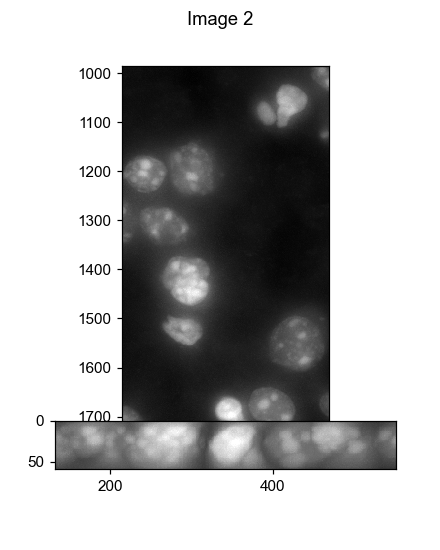

In [62]:
visual_tools.imshow_mark_3d_v2([polyt_im, dapi_im])

In [10]:
dapi_im.shape

(60, 2048, 2048)

In [10]:
# 3d segmentation
import cellpose
from cellpose import models
model_cyto = models.Cellpose(gpu=True, model_type='cyto')
masks_cyto, _, _, _ = model_cyto.eval(polyt_im, 
                                      diameter=60, 
                                      channels=[0,0], 
                                      min_size=100,
                                      anisotropy=2, # z is half sampled as x,y
                                      cellprob_threshold=0, # -6 to 6, positively correlate with number of masks
                                      resample=True,
                                      do_3D=True)

2021-09-04 00:10:50,802 [INFO] ** TORCH CUDA version installed and working. **
2021-09-04 00:10:50,803 [INFO] >>>> using GPU
2021-09-04 00:10:50,933 [INFO] ~~~ FINDING MASKS ~~~
2021-09-04 00:10:50,934 [INFO] multi-stack tiff read in as having 60 planes 1 channels
2021-09-04 00:11:17,260 [INFO] running YX: 60 planes of size (2048, 2048)
2021-09-04 00:12:07,512 [INFO] 65%|######5   | 39/60 [00:19<00:10,  1.94it/s]


2021-09-04 00:13:01,528 [INFO] 35%|###5      | 21/60 [00:10<00:18,  2.09it/s]


2021-09-04 00:13:19,624 [INFO] 100%|##########| 60/60 [00:28<00:00,  2.13it/s]
2021-09-04 00:13:43,524 [INFO] running ZY: 2048 planes of size (60, 2048)
2021-09-04 00:13:56,677 [INFO] 30%|###       | 125/410 [00:11<00:25, 10.98it/s]


2021-09-04 00:14:15,577 [INFO] 81%|########  | 331/410 [00:30<00:07, 10.76it/s]


2021-09-04 00:14:36,662 [INFO] 31%|###       | 126/410 [00:11<00:27, 10.50it/s]


2021-09-04 00:14:55,924 [INFO] 81%|########  | 332/410 [00:30<00:07, 10.70it/s]


2021-09-04 00:15:17,531 [INFO] 31%|###       | 126/410 [00:11<00:25, 11.31it/s]


2021-09-04 00:15:35,895 [INFO] 81%|########  | 332/410 [00:29<00:07, 10.85it/s]


2021-09-04 00:15:58,538 [INFO] 30%|###       | 125/410 [00:11<00:26, 10.90it/s]


2021-09-04 00:16:17,519 [INFO] 81%|########  | 331/410 [00:30<00:07, 10.89it/s]


2021-09-04 00:16:24,824 [INFO] 100%|##########| 410/410 [00:38<00:00, 10.78it/s]
2021-09-04 00:17:01,023 [INFO] running ZX: 2048 planes of size (60, 2048)
2021-09-04 00:17:14,183 [INFO] 30%|###       | 124/410 [00:11<00:26, 10.82it/s]


2021-09-04 00:17:33,214 [INFO] 80%|########  | 330/410 [00:30<00:07, 10.91it/s]


2021-09-04 00:17:54,303 [INFO] 30%|###       | 124/410 [00:11<00:26, 10.74it/s]


2021-09-04 00:18:13,679 [INFO] 80%|########  | 330/410 [00:30<00:07, 10.81it/s]


2021-09-04 00:18:35,426 [INFO] 30%|###       | 124/410 [00:11<00:26, 10.70it/s]


2021-09-04 00:18:54,653 [INFO] 80%|########  | 330/410 [00:30<00:07, 10.78it/s]


2021-09-04 00:19:17,092 [INFO] 30%|###       | 124/410 [00:11<00:26, 10.65it/s]


2021-09-04 00:19:36,140 [INFO] 80%|########  | 330/410 [00:30<00:07, 10.79it/s]


2021-09-04 00:19:43,561 [INFO] 100%|##########| 410/410 [00:38<00:00, 10.77it/s]
2021-09-04 00:20:27,655 [INFO] network run in 570.32s
2021-09-04 00:27:39,063 [INFO] masks created in 431.41s
2021-09-04 00:28:58,052 [INFO] >>>> TOTAL TIME 1087.12 sec


In [6]:
# 3d segmentation
import cellpose
from cellpose import models
model_nuc = models.Cellpose(gpu=True, model_type='nuclei')
masks_nuc, _, _, _ = model_nuc.eval(dapi_im, 
                                    diameter=60, 
                                    channels=[0,0], 
                                    min_size=60,
                                    anisotropy=2, # z is half sampled as x,y
                                    cellprob_threshold=0, # -6 to 6, positively correlate with number of masks
                                    do_3D=True)

2021-09-09 18:26:30,257 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log
2021-09-09 18:26:34,225 [INFO] ** TORCH CUDA version installed and working. **
2021-09-09 18:26:34,227 [INFO] >>>> using GPU
2021-09-09 18:26:34,336 [INFO] ~~~ FINDING MASKS ~~~
test1 (60, 2048, 2048) None None
2021-09-09 18:26:34,337 [INFO] multi-stack tiff read in as having 60 planes 1 channels
test2 (60, 2048, 2048, 2)
::> (60, 2048, 2048, 2)
2021-09-09 18:26:50,273 [INFO] running YX: 60 planes of size (2048, 2048)
2021-09-09 18:26:50,587 [INFO] 0%|          | 0/30 [00:00<?, ?it/s]


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


2021-09-09 18:27:24,059 [INFO] 33%|###3      | 10/30 [00:02<00:05,  3.38it/s]


2021-09-09 18:27:30,123 [INFO] 100%|##########| 30/30 [00:09<00:00,  3.33it/s]
2021-09-09 18:27:43,172 [INFO] running ZY: 2048 planes of size (60, 2048)
2021-09-09 18:27:54,998 [INFO] 63%|######3   | 162/256 [00:11<00:06, 14.70it/s]


2021-09-09 18:28:09,569 [INFO] 43%|####2     | 110/256 [00:07<00:09, 14.93it/s]


2021-09-09 18:28:24,210 [INFO] 23%|##2       | 58/256 [00:03<00:13, 15.02it/s]


2021-09-09 18:28:39,025 [INFO] 2%|1         | 4/256 [00:00<00:18, 13.61it/s]


2021-09-09 18:28:52,899 [INFO] 83%|########2 | 212/256 [00:14<00:02, 14.83it/s]


2021-09-09 18:28:55,859 [INFO] 100%|##########| 256/256 [00:17<00:00, 14.94it/s]
2021-09-09 18:29:15,982 [INFO] running ZX: 2048 planes of size (60, 2048)
2021-09-09 18:29:27,514 [INFO] 62%|######1   | 158/256 [00:10<00:06, 14.82it/s]


2021-09-09 18:29:42,048 [INFO] 41%|####1     | 106/256 [00:07<00:10, 14.86it/s]


2021-09-09 18:29:56,758 [INFO] 21%|##1       | 54/256 [00:03<00:13, 14.89it/s]


2021-09-09 18:30:11,478 [INFO] 0%|          | 0/256 [00:00<?, ?it/s]


2021-09-09 18:30:25,488 [INFO] 81%|########1 | 208/256 [00:14<00:03, 14.89it/s]


2021-09-09 18:30:28,724 [INFO] 100%|##########| 256/256 [00:17<00:00, 14.84it/s]
2021-09-09 18:30:55,627 [INFO] network run in 258.38s
2021-09-09 18:34:53,706 [INFO] masks created in 238.08s
2021-09-09 18:35:57,585 [INFO] >>>> TOTAL TIME 563.25 sec


In [56]:
from scipy.ndimage.filters import maximum_filter
filt_size = 5
ft_dapi_im = maximum_filter(dapi_im, filt_size)


In [42]:
import cellpose

<IPython.core.display.Javascript object>


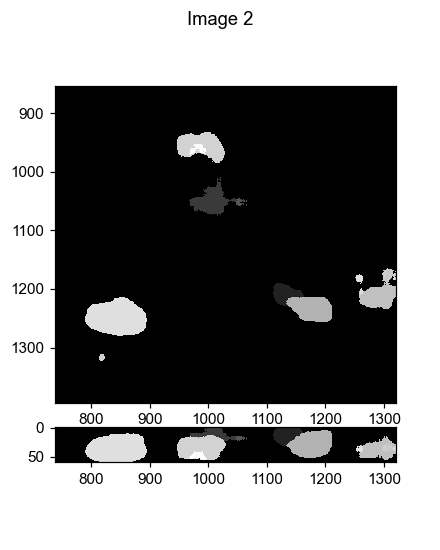

In [7]:
visual_tools.imshow_mark_3d_v2([dapi_im, masks_nuc])

In [109]:
# test cellpose 2d
reload(models)

<module 'cellpose.models' from 'E:\\Users\\puzheng\\AppData\\anaconda3\\lib\\site-packages\\cellpose\\models.py'>

In [138]:
model_test = models.Cellpose(gpu=True, model_type='nuclei')
masks_test, _, _, _ = model_test.eval(np.array([dapi_im[5:-5], dapi_im[5:-5]]),#[_ly[np.newaxis,:] for _ly in dapi_im[::5]], 
                                      z_axis=1,
                                      channel_axis=0,
                                      diameter=60, 
                                      channels=[0,0], 
                                      min_size=60,
                                      cellprob_threshold=0, # -6 to 6, positively correlate with number of masks
                                      stitch_threshold=0.1,
                                      do_3D=False)

2021-09-07 23:06:20,004 [INFO] ** TORCH CUDA version installed and working. **
2021-09-07 23:06:20,005 [INFO] >>>> using GPU
2021-09-07 23:06:20,665 [INFO] ~~~ FINDING MASKS ~~~
test1 (2, 50, 2048, 2048) 0 1
2021-09-07 23:06:20,666 [INFO] multi-stack tiff read in as having 50 planes 2 channels
test2 (50, 2048, 2048, 2)
::> (50, 2048, 2048, 2)
2021-09-07 23:07:25,661 [INFO] 100%|##########| 50/50 [01:00<00:00,  1.21s/it]
2021-09-07 23:07:25,662 [INFO] network run in 60.65s


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\torch\nn\functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


:> 50
2021-09-07 23:07:54,319 [INFO] stitching 50 masks using stitch_threshold=0.100 to make 3D masks
2021-09-07 23:07:56,694 [INFO] masks created in 31.03s
2021-09-07 23:08:00,517 [INFO] >>>> TOTAL TIME 99.85 sec


In [22]:
_im = fov.dapi_im.copy()

# max projection on z
num_layer_project = 5
num_layer_overlap = 1
_sel_layers = []
for _i, _ly in enumerate(_im):
    if _i < num_layer_project-1:
        continue
    if len(_sel_layers) == 0 or min(_sel_layers[-1][-1*num_layer_overlap-1:]) + num_layer_project <= _i:
        _sel_layers.append(np.arange(_i-num_layer_project+1, _i+1))

        print(_i, len(_sel_layers))

# generate max projections
_max_proj_layers = np.array([np.mean(_im[np.array(_lys)],axis=0) for _lys in _sel_layers])

4 1
8 2
12 3
16 4
20 5
24 6
28 7
32 8
36 9
40 10
44 11
48 12
52 13
56 14


In [10]:
?model_test.eval

Object `model_test.eval` not found.


In [27]:
# segmentation
model_test = models.Cellpose(gpu=True, model_type='nuclei')
masks_test, flows, styles, diams = model_test.eval(np.array([_max_proj_layers,_max_proj_layers]),#[_ly[np.newaxis,:] for _ly in dapi_im[::5]], 
                                      z_axis=1,
                                      channel_axis=0,
                                      diameter=60, 
                                      channels=[0,0], 
                                      min_size=10,
                                      cellprob_threshold=0.5, # -6 to 6, positively correlate with number of masks
                                      stitch_threshold=0.2,
                                      flow_threshold=1.0,
                                      do_3D=False)

2021-09-09 18:54:11,549 [INFO] ** TORCH CUDA version installed and working. **
2021-09-09 18:54:11,550 [INFO] >>>> using GPU
2021-09-09 18:54:12,279 [INFO] ~~~ FINDING MASKS ~~~
test1 (2, 14, 2048, 2048) 0 1
2021-09-09 18:54:12,280 [INFO] multi-stack tiff read in as having 14 planes 2 channels
test2 (14, 2048, 2048, 2)
::> (14, 2048, 2048, 2)
2021-09-09 18:54:29,233 [INFO] 100%|##########| 14/14 [00:15<00:00,  1.12s/it]
2021-09-09 18:54:29,233 [INFO] network run in 15.71s


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\torch\nn\functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


:> 14
2021-09-09 18:54:37,076 [INFO] stitching 14 masks using stitch_threshold=0.200 to make 3D masks
2021-09-09 18:54:37,703 [INFO] masks created in 8.47s
2021-09-09 18:54:38,709 [INFO] >>>> TOTAL TIME 26.43 sec


In [29]:
np.ones([2,2]).any(1)

array([ True,  True])

In [42]:
test = [1,2,3]
while len(test) > 0: 
    a = test.pop(0)
    print(a)
    #pass

1
2
3


In [58]:
def merge_3d_masks(masks, overlap_th=0.9):
    
    _masks = np.array(masks).copy()
    all_mask_ids = np.unique(_masks)
    all_mask_ids = all_mask_ids[all_mask_ids>0]

    xy_projections = [(_masks==_i).any(0) for _i in all_mask_ids]
    
    kept_masks = np.zeros(np.shape(_masks), dtype=np.uint16)
    kept_ids = []
    
    unprocessed_ids = list(all_mask_ids)
    
    while len(unprocessed_ids) > 0:
        # default: kept this cell
        _kept_flag = True
        # extract i
        _i = unprocessed_ids.pop(0)
        _i_msk = xy_projections[list(all_mask_ids).index(_i)]
        
        # calculate j percentage to see whether merge this into _j
        # extract j
        for _j in unprocessed_ids:
            
            _j_msk = xy_projections[list(all_mask_ids).index(_j)]

            # compare these two masks
            _i_percent = np.sum(_i_msk*_j_msk) / np.sum(_i_msk)
            _j_percent = np.sum(_i_msk*_j_msk) / np.sum(_j_msk)
            if _i_percent > 0 or _j_percent > 0:
                print(_i,_j, _i_percent,_j_percent)
            
            # remove i, merge into j
            if _i_percent > overlap_th:
                _kept_flag = False
                # update mask, i already removed by continue
                _masks[_masks==_i] = _j
                xy_projections[list(all_mask_ids).index(_j)] = (_masks==_j).any(0)
                print(f"-- skip {_i}")
                break
            # remove j, merge into i
            elif _j_percent > overlap_th:
                _kept_flag = False
                # remove j
                unprocessed_ids.pop(unprocessed_ids.index(_j))
                # update mask
                _masks[_masks==_j] = _i
                xy_projections[list(all_mask_ids).index(_i)] = (_masks==_i).any(0)
                # redo i
                unprocessed_ids = [_i] + unprocessed_ids
                print(f"-- redo {_i}")
                break
        
        # save this mask if there's no overlap
        if _kept_flag:
            
            kept_masks[_masks==_i] = np.max(np.unique(kept_masks))+1
            kept_ids.append(_i)
            print(kept_ids)
                
    return kept_masks
            
    
        

In [59]:
kept_masks = merge_3d_masks(masks_test)

[1]
2 110 0.39153696498054474 0.9182509505703422
-- redo 2
[1, 2]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6]
7 10 0.11112416304475509 0.14721444133208839
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
12 106 0.09118483412322274 0.10951730418943534
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16 114 0.06211066324661048 0.06345937850992138
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
21 119 0.05049471170249062 1.0
-- redo 21
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]
67 105 1.0 0.2765419239639908
-- skip 67
68 89 0.9860681114551083 0.10332522303325223
-- skip 68
69 111 0.30488644184445973 1.0
-- redo 69
69 114 0.7329662766689607 0.19936353425683265
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 97, 98, 99, 100]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 97, 98, 99, 100, 101]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 8

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 109, 113, 114, 115, 117, 118, 120, 121, 122, 123, 124, 126, 127, 129]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 109, 113, 114, 115, 117, 118, 120, 121, 122, 123, 124, 126, 127, 129, 131]


<IPython.core.display.Javascript object>


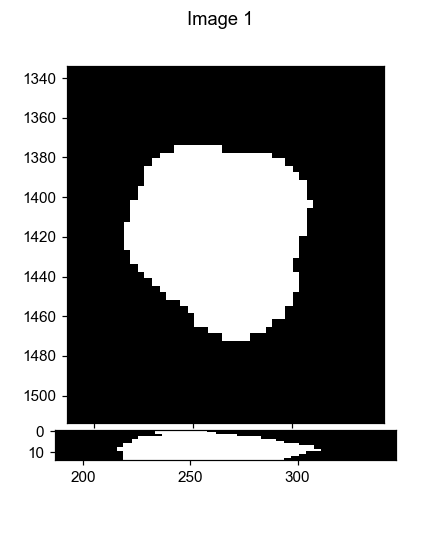

In [61]:
visual_tools.imshow_mark_3d_v2([masks_test==42])

In [101]:
np.max(kept_masks)

111

<IPython.core.display.Javascript object>


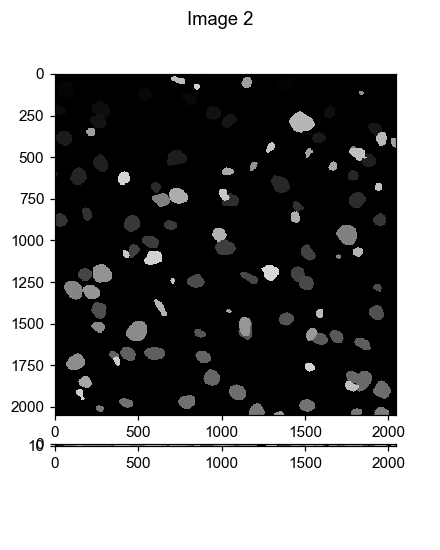

In [65]:
visual_tools.imshow_mark_3d_v2([masks_test, kept_masks])

In [66]:
z_coords

NameError: name 'z_coords' is not defined

In [71]:
z_croods = 0.2 * np.array([np.median(_lys) for _lys in _sel_layers])

In [116]:
type(np.median)

<function function.mro()>

In [107]:
class test('function'):
    pass

TypeError: str() argument 2 must be str, not tuple

In [144]:
new_full_mask = cellpose_segmentation(fov.dapi_im).run()

- 14 layers selected with <function mean at 0x000001C5CED47168> projection.
2021-09-10 01:15:32,939 [INFO] ** TORCH CUDA version installed and working. **
2021-09-10 01:15:32,940 [INFO] >>>> using GPU
2021-09-10 01:15:33,970 [INFO] ~~~ FINDING MASKS ~~~
test1 (2, 14, 2048, 2048) 0 1
2021-09-10 01:15:33,972 [INFO] multi-stack tiff read in as having 14 planes 2 channels
test2 (14, 2048, 2048, 2)
::> (14, 2048, 2048, 2)
2021-09-10 01:15:52,746 [INFO] 100%|##########| 14/14 [00:17<00:00,  1.24s/it]
2021-09-10 01:15:52,747 [INFO] network run in 17.39s


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\torch\nn\functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


:> 14
2021-09-10 01:16:00,821 [INFO] stitching 14 masks using stitch_threshold=0.200 to make 3D masks
2021-09-10 01:16:01,520 [INFO] masks created in 8.77s
2021-09-10 01:16:02,514 [INFO] >>>> TOTAL TIME 28.54 sec
- start merging 3d masks
-- overlap found for cell:2 to 110 0.39153696498054474 0.9182509505703422
--- redo 2
-- overlap found for cell:7 to 10 0.11112416304475509 0.14721444133208839
-- overlap found for cell:12 to 106 0.09118483412322274 0.10951730418943534
-- overlap found for cell:16 to 114 0.06211066324661048 0.06345937850992138
-- overlap found for cell:21 to 119 0.05049471170249062 1.0
--- redo 21
-- overlap found for cell:24 to 120 0.30507343124165553 0.6338418862690708
-- overlap found for cell:29 to 132 0.0440563086548488 1.0
--- redo 29
-- overlap found for cell:32 to 33 1.0 0.1061162740436568
--- skip 32
-- overlap found for cell:33 to 101 0.10881780851523666 0.16231463571889104
-- overlap found for cell:33 to 112 0.234709314890858 1.0
--- redo 33
-- overlap found 

In [77]:
save_folder = r'\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation'
save_filename = os.path.join(save_folder, os.path.basename(fov.save_filename).replace('.hdf5', ""))
print(save_filename)
if not os.path.exists(save_filename):
    np.save(save_filename, full_masks)

\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\Analysis\segmentation\Conv_zscan_02


<IPython.core.display.Javascript object>


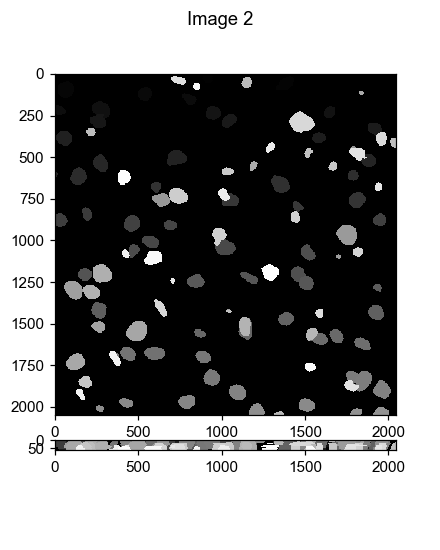

In [145]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im, full_mask, new_full_mask])

In [72]:
full_masks = interploate_z_masks(kept_masks, z)

0.4
0.4
0.4
0.4
1.2000000000000002
1.2000000000000002
1.2000000000000002
1.2000000000000002
2.0
2.0
2.0
2.8000000000000003
2.8000000000000003
2.8000000000000003
2.8000000000000003
3.6
3.6
3.6
4.4
4.4
4.4
5.2
5.2
5.2
6.0
6.0
6.0
6.800000000000001
6.800000000000001
6.800000000000001
6.800000000000001
7.6000000000000005
7.6000000000000005
7.6000000000000005
7.6000000000000005
8.4
8.4
8.4
9.200000000000001
9.200000000000001
9.200000000000001
9.200000000000001
10.0
10.0
10.0
10.8
10.8
10.8
10.8
10.8
10.8


In [78]:
full_masks.shape

(60, 2048, 2048)

<IPython.core.display.Javascript object>


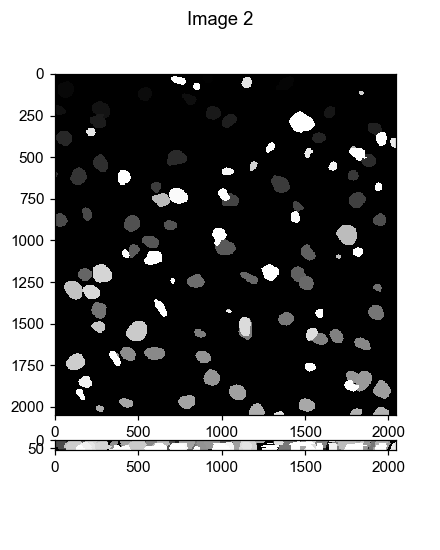

In [73]:
visual_tools.imshow_mark_3d_v2([dapi_im, full_masks])

In [67]:
def interploate_z_masks(z_masks, z_coords, 
                        target_z_coords=np.round(np.arange(0,12,0.2), 2),
                        mode='nearest'):
    
    # target z
    _final_mask = []
    _final_coords = np.round(target_z_coords, 3)
    for _fz in _final_coords:
        if _fz in z_coords:
            _final_mask.append(z_masks[np.where(z_coords==_fz)[0][0]])
        else:
            if mode == 'nearest':
                print(z_coords[np.argmin(np.abs(z_coords-_fz))])
                _final_mask.append(z_masks[np.argmin(np.abs(z_coords-_fz))])
                continue
            # find nearest neighbors
            if np.sum(z_coords > _fz) > 0:
                _upper_z = np.min(z_coords[z_coords > _fz])
            else:
                _upper_z = np.max(z_coords)
            if np.sum(z_coords < _fz) > 0:
                _lower_z = np.max(z_coords[z_coords < _fz])
            else:
                _lower_z = np.min(z_coords)

            if _upper_z == _lower_z:
                # copy the closest mask to extrapolate
                _final_mask.append(z_masks[np.where(z_coords==_upper_z)[0][0]])
            else:
                # interploate
                _upper_mask = z_masks[np.where(z_coords==_upper_z)[0][0]].astype(np.float32)
                _lower_mask = z_masks[np.where(z_coords==_lower_z)[0][0]].astype(np.float32)
                _inter_mask = (_upper_z-_fz)/(_upper_z-_lower_z) * _lower_mask 
                print(_fz, _upper_z, _lower_z)
    
    return np.array(_final_mask)

<IPython.core.display.Javascript object>


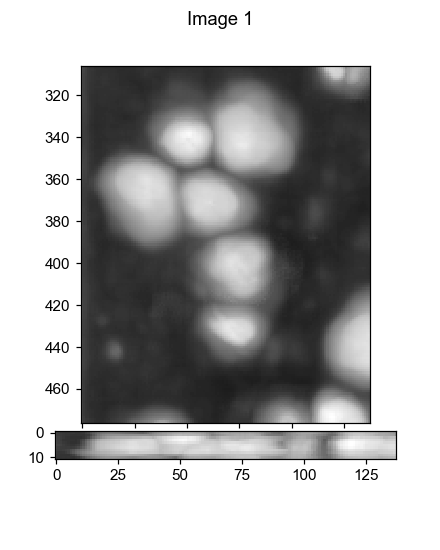

In [17]:
visual_tools.imshow_mark_3d_v2([flows[2]])

In [115]:
import torch
torch.cuda.empty_cache()
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 7            |        cudaMalloc retries: 10        |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |    9061 MB |    9064 MB |   37417 GB |   37408 GB |
|       from large pool |    8930 MB |    8933 MB |   37284 GB |   37275 GB |
|       from small pool |     130 MB |     138 MB |     133 GB |     133 GB |
|---------------------------------------------------------------------------|
| Active memory         |    9061 MB |    9064 MB |   37417 GB |   37408 GB |
|       from large pool |    8930 MB |    8933 MB |   37284 GB |

In [5]:
fov.rna_ref_id = 0
rna_ref_im = fov._load_reference_image('rna', _overwrite=True)

+ load reference image from file:\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H1R1\Conv_zscan_02.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H1R1\Conv_zscan_02.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210624-P_Forebrain_smFISH_CTP09\H1R1\Conv_zscan_02.dax  in 3.279s
-- removing hot pixels for channels:['488'] in 11.925s
-- illumination correction for channels: 488, in 3.432s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 19.611s
-- saving fov_info to file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_02.hdf5
++ base attributes saved:['rna_ref_im'] in 12.762s.


In [57]:
fov.rna_ref_id = 0
# process image into spots
fov._process_image_to_spots('rna', 
                            #_sel_ids=np.arange(1,21),
                            _load_common_reference=True,
                            _load_with_multiple=False,
                            _save_images=True,
                            _warp_images=True, 
                            _fit_spots=False,
                            _overwrite_drift=True,
                            _overwrite_image=True,
                            _overwrite_spot=False,
                            _verbose=True)

-- No folder selected, allow processing all 36 folders
-- checking rna, region:[1] in 0.004s.
used_channels: ['647', '488', '405']
-- checking rna, region:[2] in 0.003s.
used_channels: ['647', '488']
-- checking rna, region:[3] in 0.002s.
used_channels: ['647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647'

In [85]:
seg_im = np.stack([np.zeros(np.shape(rna_ref_im)), 
                   rna_ref_im/np.max(rna_ref_im), 
                   dapi_im / np.max(dapi_im)]).transpose((1,2,3,0))

In [ ]:
# rescale
min_per = 10
max_per = 98
seg_im = [np.zeros(np.shape(rna_ref_im))]

_min_im, _max_im = scipy.stats.

In [98]:
# 2d segmentation
import cellpose
from cellpose import models
model_2d = models.Cellpose(gpu=True, model_type='nuclei')
masks_2d, flows_2d, styles_2d, diams_2d = model_2d.eval(np.mean(dapi_im, axis=0), 
                                                        diameter=60, channels=[0,0], 
                                                        min_size=100,
                                                        do_3D=False)

2021-07-13 14:33:41,216 [INFO] ** TORCH CUDA version installed and working. **
2021-07-13 14:33:41,217 [INFO] >>>> using GPU
2021-07-13 14:33:41,779 [INFO] ~~~ FINDING MASKS ~~~
2021-07-13 14:33:43,804 [INFO] >>>> TOTAL TIME 2.03 sec


<IPython.core.display.Javascript object>


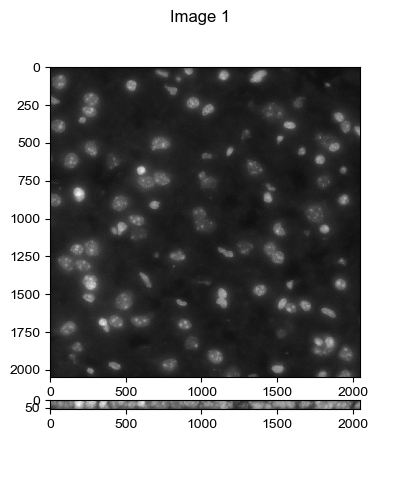

In [99]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im, masks_2d[np.newaxis,:]])

In [6]:
# 3d segmentation
import cellpose
from cellpose import models
model_3d = models.Cellpose(gpu=True, model_type='nuclei')
masks_3d, flows_3d, styles_3d, diams_3d = model_3d.eval(dapi_im, 
                                                        diameter=60, channels=[0,0], 
                                                        min_size=200,
                                                        anisotropy=1.5,
                                                        do_3D=True)

2021-07-16 23:57:30,293 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log
2021-07-16 23:57:34,158 [INFO] ** TORCH CUDA version installed and working. **
2021-07-16 23:57:34,159 [INFO] >>>> using GPU
2021-07-16 23:57:34,266 [INFO] ~~~ FINDING MASKS ~~~
2021-07-16 23:57:34,267 [INFO] multi-stack tiff read in as having 60 planes 1 channels
2021-07-16 23:57:48,605 [INFO] running YX: 60 planes of size (2048, 2048)
2021-07-16 23:57:48,863 [INFO] 0%|          | 0/30 [00:00<?, ?it/s]


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


2021-07-16 23:58:19,025 [INFO] 33%|###3      | 10/30 [00:02<00:05,  3.73it/s]


2021-07-16 23:58:24,405 [INFO] 100%|##########| 30/30 [00:08<00:00,  3.72it/s]
2021-07-16 23:58:37,079 [INFO] running ZY: 2048 planes of size (60, 2048)
2021-07-16 23:58:49,215 [INFO] 92%|#########1| 235/256 [00:11<00:01, 20.13it/s]


2021-07-16 23:59:03,536 [INFO] 100%|##########| 256/256 [00:12<00:00, 20.11it/s]


2021-07-16 23:59:19,307 [INFO] 13%|#2        | 33/256 [00:01<00:11, 20.10it/s]


2021-07-16 23:59:30,373 [INFO] 100%|##########| 256/256 [00:12<00:00, 20.15it/s]
2021-07-16 23:59:49,397 [INFO] running ZX: 2048 planes of size (60, 2048)
2021-07-16 23:59:53,543 [INFO] 29%|##8       | 74/256 [00:03<00:09, 20.22it/s]


2021-07-17 00:00:09,243 [INFO] 49%|####8     | 125/256 [00:06<00:06, 20.29it/s]


2021-07-17 00:00:24,731 [INFO] 66%|######6   | 169/256 [00:08<00:04, 20.20it/s]


2021-07-17 00:00:40,609 [INFO] 85%|########5 | 218/256 [00:10<00:01, 20.23it/s]


2021-07-17 00:00:42,489 [INFO] 100%|##########| 256/256 [00:12<00:00, 20.23it/s]
2021-07-17 00:01:09,768 [INFO] network run in 212.51s
2021-07-17 00:04:46,222 [INFO] masks created in 216.45s
2021-07-17 00:05:39,752 [INFO] >>>> TOTAL TIME 485.49 sec


In [ ]:
import torch

<IPython.core.display.Javascript object>


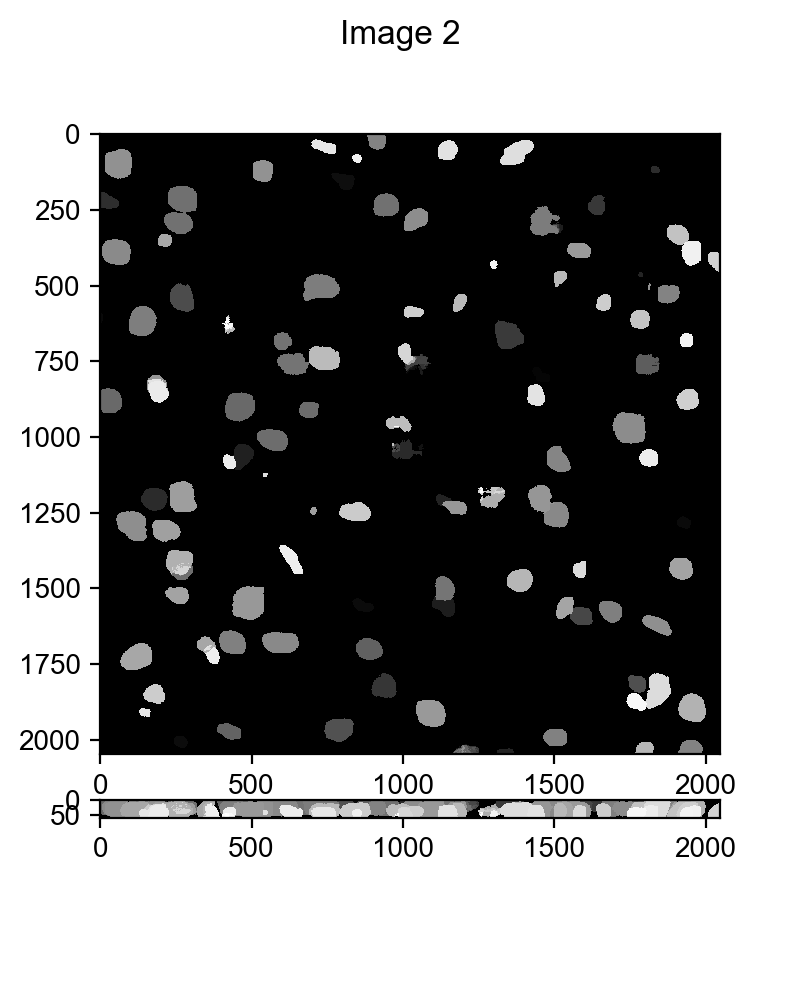

In [7]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im, masks_3d])

In [8]:
import torch
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   25879 KB |    7972 MB |    9348 GB |    9348 GB |
|       from large pool |   18432 KB |    7965 MB |    9337 GB |    9337 GB |
|       from small pool |    7447 KB |      14 MB |      10 GB |      10 GB |
|---------------------------------------------------------------------------|
| Active memory         |   25879 KB |    7972 MB |    9348 GB |    9348 GB |
|       from large pool |   18432 KB |    7965 MB |    9337 GB |

In [113]:
del(model_2d)

In [114]:
import torch
torch.cuda.empty_cache()

<IPython.core.display.Javascript object>


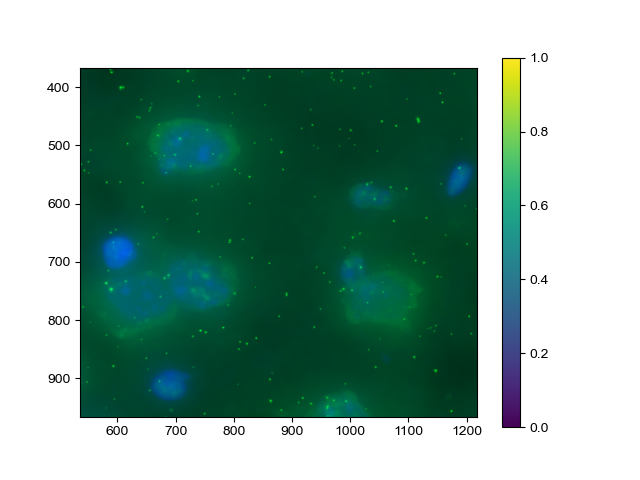

In [87]:
plt.figure()
plt.imshow(seg_im.max(0))
plt.colorbar()

<IPython.core.display.Javascript object>


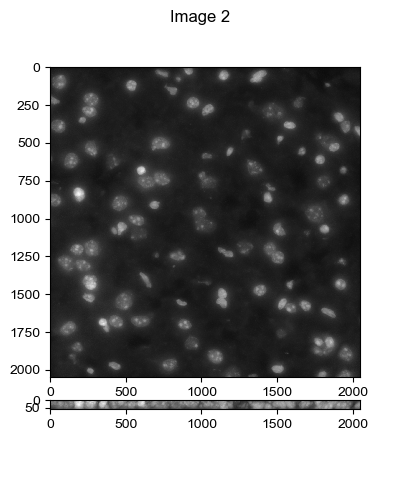

In [65]:
visual_tools.imshow_mark_3d_v2([rna_ref_im, dapi_im])

# Start from here

In [6]:
fov._load_from_file('combo')
fov._load_from_file('gene')

+ loading combo from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_00.hdf5
++ finish loading combo in 0.027s. 
+ loading gene from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_00.hdf5
++ finish loading gene in 0.003s. 


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


In [7]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['gene']
    gene_ims = _grp['ims'][:]
    gene_ids = _grp['ids'][:]
        #gene_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


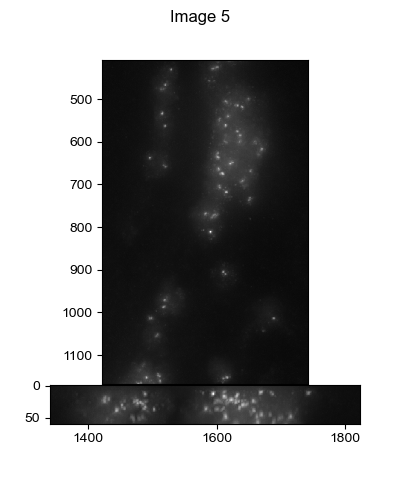

In [8]:
%matplotlib notebook
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(gene_ims[:])

In [42]:
kept_gene_spots_list = []
kept_inds_list = []

_verbose=True
crop_size = 11
dapi_crop_size = 5
snr_th = 1.5
dapi_snr_th = 2

for _spots in gene_spots_list:
    _kept_spots = []
    _kept_inds = []
    for _i, _spot in enumerate(_spots):
        #print(_spot[1:4])
        if (_spot[1:4] <= np.zeros(3)).any() or (_spot[1:4] >= np.array(fov.shared_parameters['single_im_size'])).any():
            continue
        local_gene_crop = io_tools.crop.crop_neighboring_area(
            gene_ims[gene_id], _spot[1:4], crop_size,
        )
        local_dapi_crop = io_tools.crop.crop_neighboring_area(
            fov.dapi_im, _spot[1:4], dapi_crop_size,
        )
        if np.max(local_gene_crop) > gene_bg * snr_th and np.max(local_dapi_crop) > dapi_bg * dapi_snr_th:
            _kept_spots.append(_spot)
            _kept_inds.append(_i)
    # append
    kept_gene_spots_list.append(np.array(_kept_spots))
    kept_inds_list.append(np.array(_kept_inds, dtype=np.int32))

E:\Users\puzheng\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [173]:
reload(ia.segmentation_tools.chromosome)

gene_chrom_dict = {}
for _gind, _gid in enumerate(fov.gene_ids):
    gene_chrom_dict[_gid] = ia.segmentation_tools.chromosome.identify_chromosomes(gene_ims[_gind], fov.dapi_im)

-- generate seeding image.
-- binarize image with chromosome SNR: 1.5
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:467: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


-- find objects larger than size=25
-- start multiprocessing caluclate chromosome coordinates with 12 threads in 320.549s.
-- 244 chromosomes identified
-- generate seeding image.
-- binarize image with chromosome SNR: 1.5
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.
-- find objects larger than size=25
-- start multiprocessing caluclate chromosome coordinates with 12 threads in 345.408s.
-- 215 chromosomes identified
-- generate seeding image.
-- binarize image with chromosome SNR: 1.5
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.
-- find objects larger than size=25
-- start multiprocessing caluclate chromosome coordinates with 12 threads in 240.088s.
-- 192 chromosomes identified
-- generate seeding image.
-- binarize image with chromosome SNR: 1.5
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.
-- find objects larger than size=2

In [13]:
gene_id = 4

from scipy.ndimage.filters import maximum_filter,minimum_filter,gaussian_filter


_im = gene_ims[gene_id]
_max_im = np.array(gaussian_filter(_im, 0.75), dtype=np.float)
_min_im = np.array(gaussian_filter(_im, 7.5), dtype=np.float)
_seed_im = _max_im - _min_im

In [20]:
snr_th = 1.3
dapi_snr_th = 2


In [15]:
gene_bg = io_tools.load.find_image_background(gene_ims[gene_id])
# caculate background for dapi
dapi_bg = io_tools.load.find_image_background(fov.dapi_im)

In [21]:
(snr_th - 1) * gene_bg

1549.5000000000002

In [22]:
_binary_im = (_seed_im > (snr_th - 1) * gene_bg) * (fov.dapi_im > dapi_bg * dapi_snr_th)

In [23]:
visual_tools.imshow_mark_3d_v2([_binary_im, _seed_im, gene_ims[gene_id]])

<IPython.core.display.Javascript object>

In [115]:
from scipy import ndimage
from skimage import morphology
#from scipy.stats import scoreatpercentile
_verbose=True
_morphology_size=1
## 3. erosion and dialation
if _verbose:
    print(f"-- erosion and dialation with size={_morphology_size}.")
_binary_label = _binary_im.copy()
_binary_label = ndimage.binary_erosion(_binary_label, morphology.ball(_morphology_size))
_binary_label = ndimage.binary_dilation(_binary_label, morphology.ball(_morphology_size))
_binary_label = ndimage.binary_fill_holes(_binary_label, structure=morphology.ball(_morphology_size))

-- erosion and dialation with size=1.


In [116]:
## 4. find object
if _verbose:
    print(f"-- find close objects.")
_open_objects = morphology.opening(_binary_label, morphology.ball(0))
_close_objects = morphology.closing(_open_objects, morphology.ball(1))
_label, _num = ndimage.label(_close_objects)
_label[_label==0] = -1

-- find close objects.


In [117]:
## 5. segmentation
_random_walk_beta = 10
if _verbose:
    print(f"-- random walk segmentation, beta={_random_walk_beta}.")
from skimage.segmentation import random_walker
_seg_label = random_walker(gene_ims[gene_id], _label, beta=_random_walk_beta, mode='cg_mg')
_seg_label[_seg_label < 0] = 0

-- random walk segmentation, beta=10.


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:467: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


In [118]:
_min_label_size = 25
## 6. keep objects
if _verbose:
    print(f"-- find objects larger than size={_min_label_size}")
_kept_label = morphology.remove_small_objects(_seg_label, _min_label_size).astype(np.uint16)
_label_ids = np.unique(_kept_label)
_label_ids = _label_ids[_label_ids > 0]

-- find objects larger than size=25


In [119]:
## 7. calculate chr centers    
import multiprocessing as mp
_num_threads = 24

_chrom_args = [(_kept_label==_id,) for _id in _label_ids]

with mp.Pool(_num_threads,) as _chrom_pool:
    if _verbose:
        print(f"- Start multiprocessing caluclate chromosome coordinates with {_num_threads} threads", end=' ')
        _multi_time = time.time()
    # Multi-proessing!
    _chrom_coords = _chrom_pool.starmap(segmentation_tools.chromosome._calculate_binary_center, _chrom_args, chunksize=1)
    # close multiprocessing
    _chrom_pool.close()
    _chrom_pool.join()
    _chrom_pool.terminate()
    if _verbose:
        print(f"in {time.time()-_multi_time:.3f}s.")

_chrom_coords = np.array(_chrom_coords)

- Start multiprocessing caluclate chromosome coordinates with 24 threads in 298.022s.


<IPython.core.display.Javascript object>


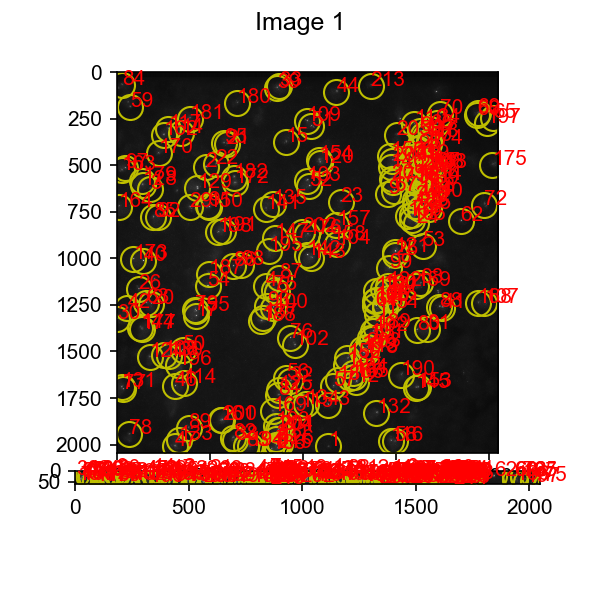

<IPython.core.display.Javascript object>

In [174]:
# visualize_all_chromosomes
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }

coord_dict['coords'] += list(np.flipud(_chrom_coord) for _chrom_coord in gene_chroms)
coord_dict['class_ids'] += list(np.zeros(len(gene_chroms),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2([gene_ims[gene_id]], 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

In [120]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }

coord_dict['coords'] += list(np.flipud(_chrom_coord) for _chrom_coord in _chrom_coords)
coord_dict['class_ids'] += list(np.zeros(len(_chrom_coords),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2([gene_ims[gene_id], _binary_im, _binary_label, _kept_label], 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

<IPython.core.display.Javascript object>

In [224]:
gid = 4

dna_reg_ids = fov.combo_ids
dna_reg_channels = fov.combo_channels
chrom_coords = gene_chrom_dict[gid]

intensity_th = 200

from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

print(f"input chromosomes: {len(chrom_coords)}")

kept_spots_list = []
for _spots in fov.combo_spots_list:
    kept_spots_list.append(_spots[_spots[:,0] > intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)

reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys

dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]

# select_hzxys close to the chromosome center
dist_th = 3000 # upper limit is 3000nm
good_chr_th = 0.8 # 80% of regions should have candidate spots

sel_dna_cand_hzxys_list = []
sel_chrom_coords = []
chr_cand_pers = []
sel_chr_cand_pers = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, chrom_coords):
    _chr_cand_per = 0
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[(_dists < dist_th)])
            _chr_cand_per += 1
    
    _chr_cand_per *= 1/len(_cand_hzxys)
    # append
    if _chr_cand_per >= good_chr_th:
        sel_dna_cand_hzxys_list.append(_sel_cands_list)
        sel_chrom_coords.append(_chrom_coord)
        sel_chr_cand_pers.append(_chr_cand_per)
    
    chr_cand_pers.append(_chr_cand_per)
    
print(f"kept chromosomes: {len(sel_chrom_coords)}")

input chromosomes: 303
kept chromosomes: 272


+ iter:0
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.151s
--- collapse all regions into 1d.


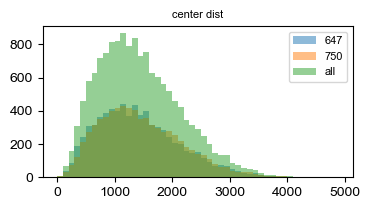

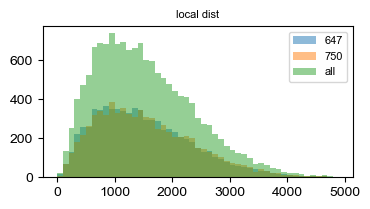

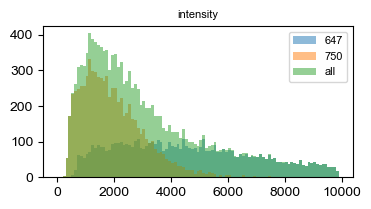

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.443s
-- region kept: 0.6718


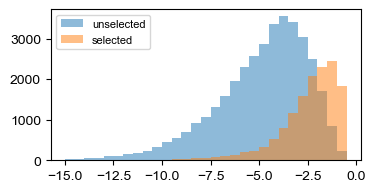

+ iter:1
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.334s
--- collapse all regions into 1d.


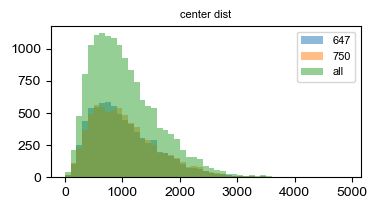

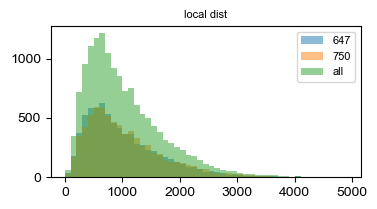

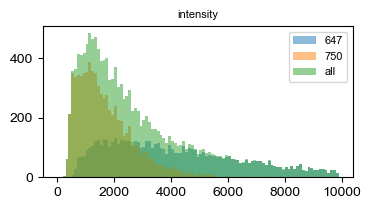

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.342s
-- region kept: 0.8891


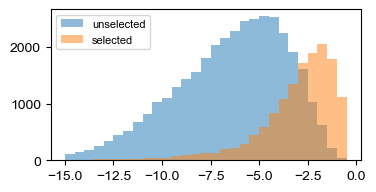

+ iter:2
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.336s
--- collapse all regions into 1d.


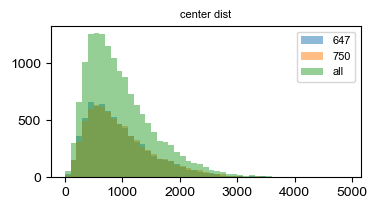

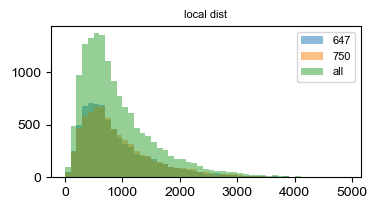

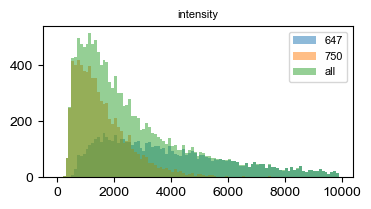

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.461s
-- region kept: 0.9602


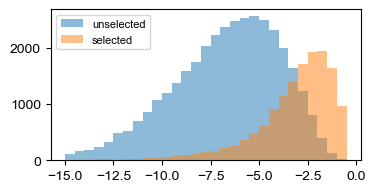

+ iter:3
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.428s
--- collapse all regions into 1d.


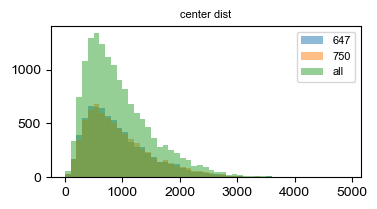

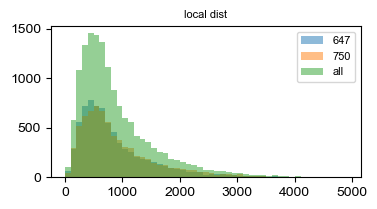

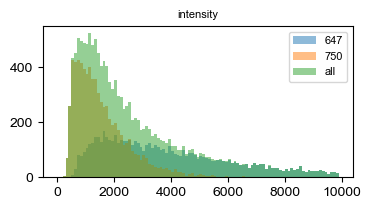

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.437s
-- region kept: 0.9826


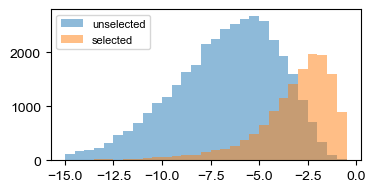

+ iter:4
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.417s
--- collapse all regions into 1d.


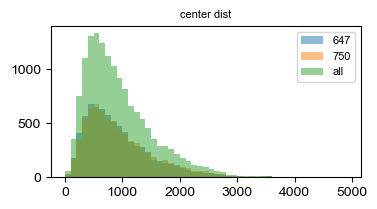

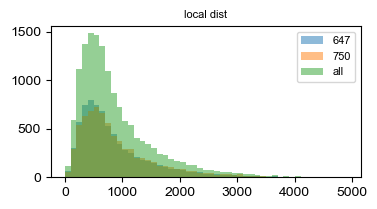

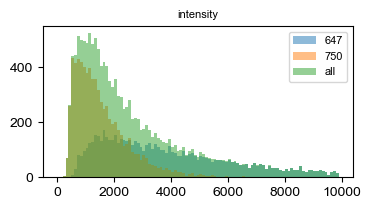

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.457s
-- region kept: 0.9922


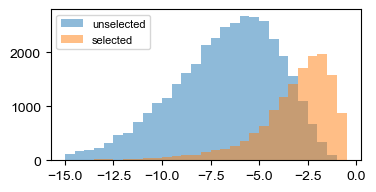

+ iter:5
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.536s
--- collapse all regions into 1d.


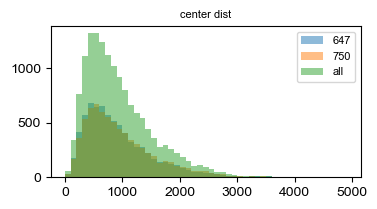

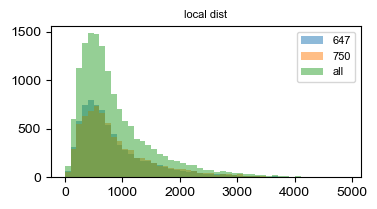

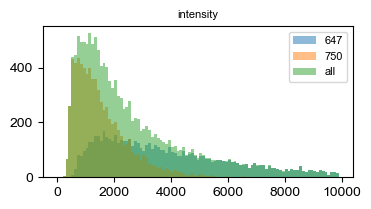

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.465s
-- region kept: 0.9954


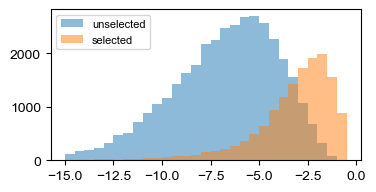

+ iter:6
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.551s
--- collapse all regions into 1d.


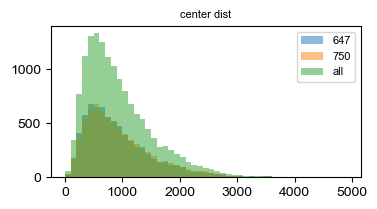

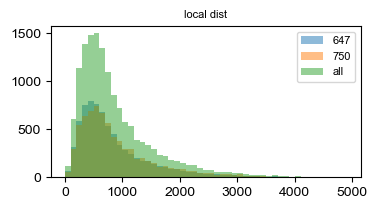

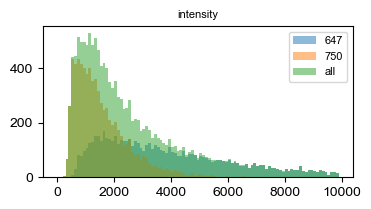

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.451s
-- region kept: 0.9973


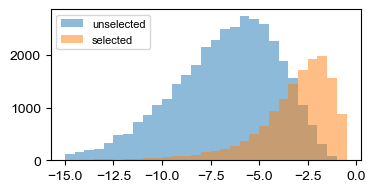

+ iter:7
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.453s
--- collapse all regions into 1d.


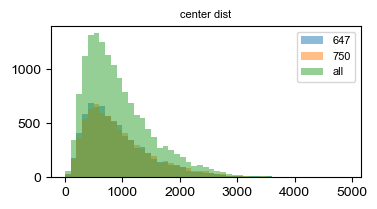

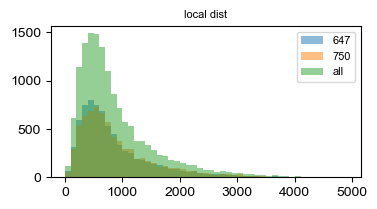

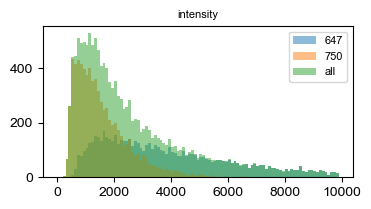

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.448s
-- region kept: 0.9977


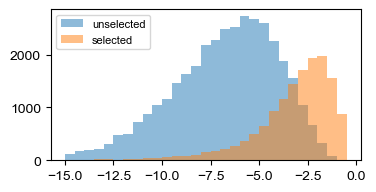

+ iter:8
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.410s
--- collapse all regions into 1d.


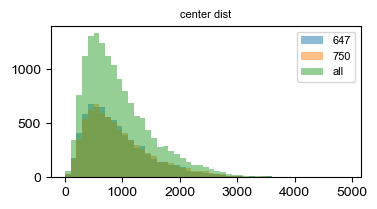

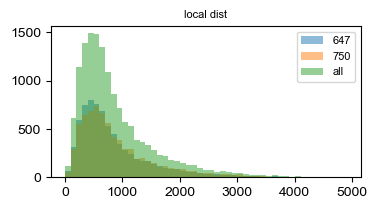

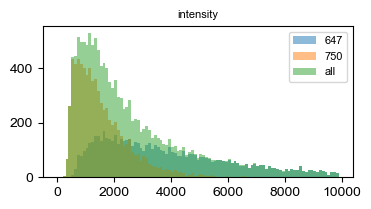

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.462s
-- region kept: 0.9976


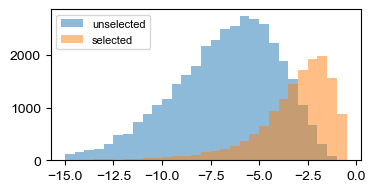

+ iter:9
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.442s
--- collapse all regions into 1d.


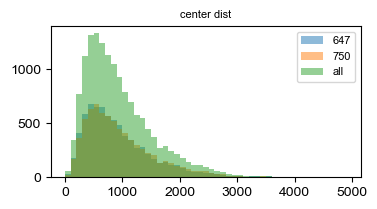

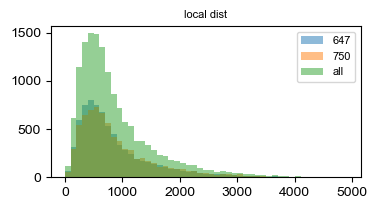

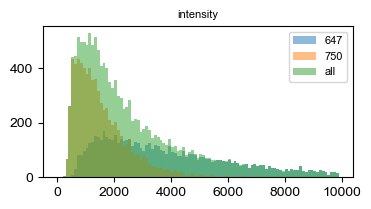

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.458s
-- region kept: 0.9979


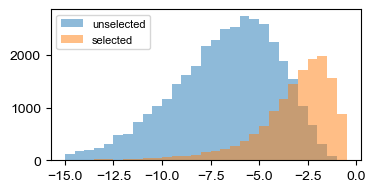

In [225]:
%matplotlib inline
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import _maximize_score_spot_picking_of_chr, pick_spots_by_intensities,pick_spots_by_scores, generate_reference_from_population, evaluate_differences

niter= 10
num_threads = 24
ref_chr_cts = None
# initialize
init_dna_hzxys = pick_spots_by_intensities(sel_dna_cand_hzxys_list)
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []

for _iter in range(niter):
    print(f"+ iter:{_iter}")
    # E: generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1], dna_reg_ids,
        ref_channels=dna_reg_channels,
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_channels=True,
        verbose=True,
    )
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ct_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,5000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('center dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_local_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,5000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('local dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ints.items():
        plt.hist(np.array(_v), bins=np.arange(0,10000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('intensity', fontsize=8)
    plt.show()
    
    # M: pick based on scores
    sel_hzxys_list, sel_scores_list, all_scores_list, other_scores_list = \
    pick_spots_by_scores(
        sel_dna_cand_hzxys_list, dna_reg_ids,
        ref_hzxys_list=sel_dna_hzxys_list[-1], ref_ids=dna_reg_ids, ref_channels=dna_reg_channels,
        ref_ct_dists=ref_ct_dists, ref_local_dists=ref_local_dists, ref_ints=ref_ints, 
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_intensity_channels=True,
        return_other_scores=True,
        verbose=True,
    )
    # check updating rate
    update_rate = evaluate_differences(sel_hzxys_list, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    # append
    sel_dna_hzxys_list.append(sel_hzxys_list)
    sel_dna_scores_list.append(sel_scores_list)
    all_dna_scores_list.append(all_scores_list)
    
    plt.figure(figsize=(4,2), dpi=100)
    plt.hist(np.concatenate([np.concatenate(_scores) 
                       for _scores in other_scores_list]), 
             bins=np.arange(-15, 0, 0.5), alpha=0.5, label='unselected')
    plt.hist(np.ravel([np.array(_sel_scores) 
                       for _sel_scores in sel_dna_scores_list[-1]]), 
             bins=np.arange(-15, 0, 0.5), alpha=0.5, label='selected')
    plt.legend(fontsize=8)
    plt.show()
    
    if update_rate > 0.998:
        break

In [226]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
kept_chr_ids = []
distmap_list = []
score_th = -4.5
int_th = 200
bad_spot_percentage = 1

for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    # remove spots by intensity
    _bad_inds = _kept_hzxys[:,0] < int_th
    # remove spots by scores
    _bad_inds += _scores < score_th
    #print(np.mean(_bad_inds))
    _kept_hzxys[_bad_inds] = np.nan
    
    
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        kept_chr_ids.append(True)
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))
    else:
        kept_chr_ids.append(False)

kept_chr_ids = np.array(kept_chr_ids, dtype=np.bool)
#kept_chrom_coords = np.array(sel_chrom_coords)[kept_chr_ids]
distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

0.2774509803921568


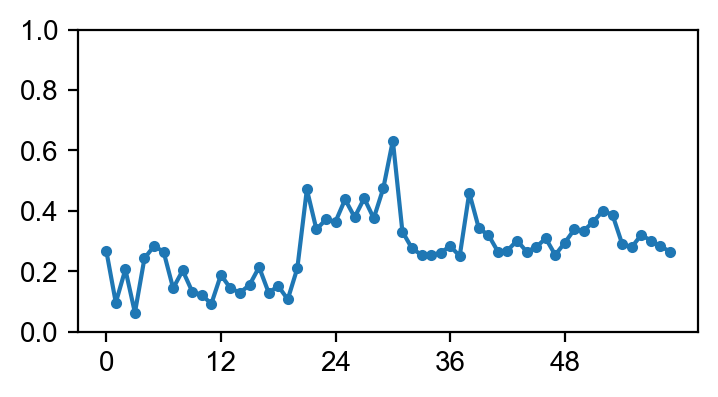

In [227]:
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
print(np.mean(loss_rates))
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
ax.set_ylim([0,1])
ax.set_xticks(np.arange(0,len(dna_reg_ids),int(len(dna_reg_ids)/5)))
plt.show()

In [228]:
np.where(loss_rates > 0.3)[0]+1

array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 39, 40, 41, 44, 47, 50,
       51, 52, 53, 54, 57, 58], dtype=int64)

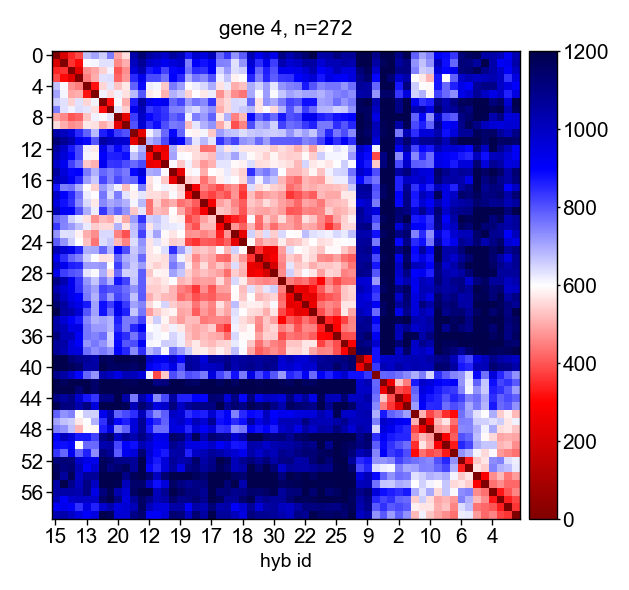

In [255]:
imaging_order = []
for _fd, _infos in fov.color_dic.items():
    for _info in _infos:
        if len(_info) > 0 and _info[0] == 'c':
            if int(_info[1:]) in dna_reg_ids:
                imaging_order.append(list(dna_reg_ids).index(int(_info[1:])))
imaging_order = np.array(imaging_order, dtype=np.int)
#kept_inds = imaging_order # plot imaging ordered regions

#kept_inds = np.where(np.array(dna_reg_channels) == '647')[0] # plot sepecific channel
#kept_inds = np.where(loss_rates<0.5)[0] # plot good regions only
kept_inds = np.arange(len(fov.combo_ids)) # plot all
kept_inds = leaves_list(clusters)

%matplotlib inline

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,1200],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=500)
ax.set_title(f"gene {gid}, n={len(distmap_list)}", fontsize=7.5)

#_ticks = np.arange(0, len(kept_inds), 20)
_ticks = np.arange(0, len(kept_inds), 4)

ax.set_xticks(_ticks)
#ax.set_xticklabels(dna_reg_ids[kept_inds][_ticks])
#x.set_xlabel(f"10kb region id", fontsize=7, labelpad=2)
ax.set_xticklabels(np.array((dna_reg_ids[kept_inds][_ticks]-1)/2+1, dtype=np.int32))
ax.set_xlabel(f"hyb id", fontsize=7, labelpad=2)

ax.set_yticks(_ticks)
#ax.set_yticklabels(dna_reg_ids[kept_inds][_ticks])
#ax.set_ylabel(f"10kb region id", fontsize=7, labelpad=2)




#ax.axvline(x=np.where(dna_reg_ids[kept_inds]>300)[0][0], color=[1,1,0])
#ax.axhline(y=np.where(dna_reg_ids[kept_inds]>300)[0][0], color=[1,1,0])

plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

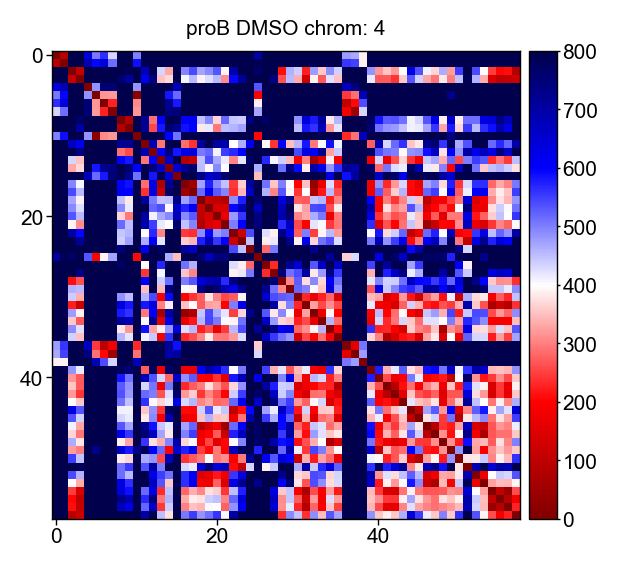

-- add colorbar with colornorm: <matplotlib.colors.Normalize object at 0x0000026428B66A48>


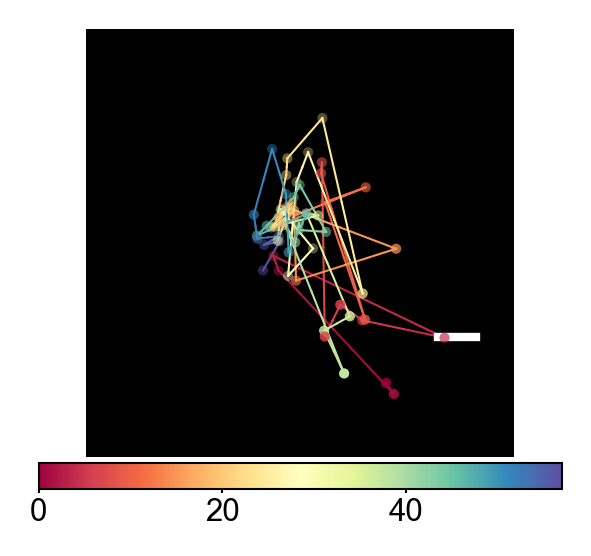

In [199]:
%matplotlib inline


reload(figure_tools.image)

chrom_id = 4

import matplotlib
import copy

sc_cmap = copy.copy(matplotlib.cm.get_cmap('seismic_r'))
sc_cmap.set_bad(color=[0.5,0.5,0.5,1])

valid_inds = np.where(np.isnan(final_dna_hzxys_list[chrom_id]).sum(1) == 0)[0]
#valid_inds = np.ones(len(final_dna_hzxys_list[chrom_id]), dtype=np.bool) # all spots

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(
        distmap_list[chrom_id][valid_inds][:,valid_inds], 
        color_limits=[0,800],
        ax=ax,
        cmap=sc_cmap,
        ticks=np.arange(0,150,20), 
        figure_dpi=200)
ax.set_title(f"proB DMSO chrom: {chrom_id}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

ax3d = figure_tools.image.chromosome_structure_3d_rendering(
        final_dna_hzxys_list[chrom_id][valid_inds, 1:], 
        marker_edge_line_width=0,
        reference_bar_length=200, image_radius=500, 
        line_width=0.5, figure_dpi=300, depthshade=True)
plt.show()

<IPython.core.display.Javascript object>


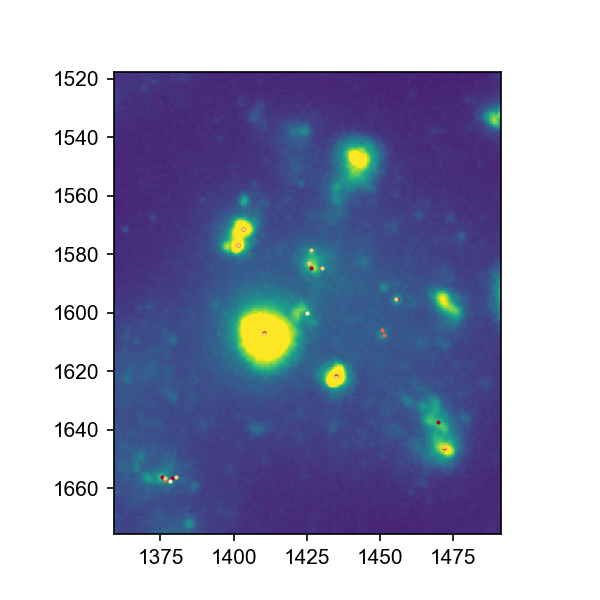

0
1
2
3


In [47]:
from matplotlib.cm import Spectral

plt.figure(figsize=(4,4), dpi=150)
plt.gca().invert_yaxis()
#plt.imshow(masks_2d)
plt.imshow(gene_ims[gene_id].max(0), vmin=1000, vmax=3000)

#for _rid, _uspots in enumerate(fov.unique_spots_list):
for _i, _rid in enumerate(gene_unique_rids):
    print(_i)
    _uspots = kept_gene_spots_list[_i]
    #_uspots = gene_spots_list[_i]
    plt.plot(_uspots[:,3], _uspots[:,2], '.', markersize=2, 
             color=Spectral(_i/len(gene_unique_rids) * 0.7) )

plt.show()

In [23]:
im_bg

1075.0

<IPython.core.display.Javascript object>


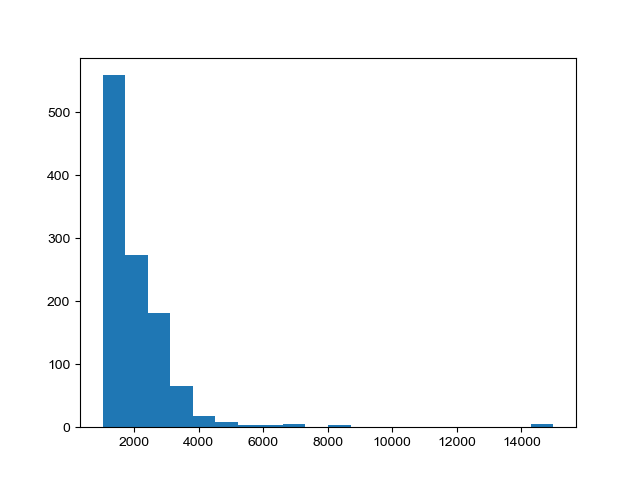

(array([559., 273., 182.,  66.,  17.,   9.,   3.,   4.,   5.,   0.,   3.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.]),
 array([ 1027.  ,  1725.15,  2423.3 ,  3121.45,  3819.6 ,  4517.75,
         5215.9 ,  5914.05,  6612.2 ,  7310.35,  8008.5 ,  8706.65,
         9404.8 , 10102.95, 10801.1 , 11499.25, 12197.4 , 12895.55,
        13593.7 , 14291.85, 14990.  ]),
 <a list of 20 Patch objects>)

In [21]:
plt.figure()
plt.hist(nb_max_ints, 20)

<IPython.core.display.Javascript object>


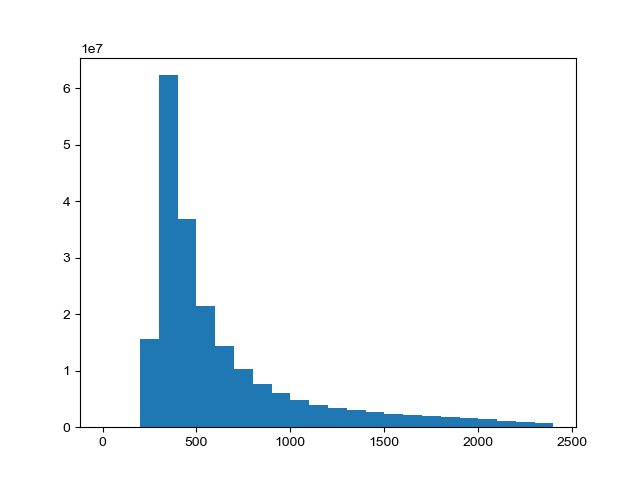

In [38]:
plt.figure()
plt.hist(np.ravel(fov.dapi_im), bins=np.arange(0,2500,100))
#plt.yscale('log')
plt.show()

In [23]:
intensity_th = 500

kept_raw_spots = []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    gene_unique_ims = _grp['ims'][gene_unique_rids]
    for _i, _rid in enumerate(gene_unique_rids):
        print(len(kept_gene_flags[_i]), len(_grp['raw_spots'][_rid]))
        kept_raw_spots.append(_grp['raw_spots'][_rid][np.where(kept_gene_flags[_i])[0]])

291 2000
271 2000
306 2000
280 2000


In [27]:
gene_unique_ims

array([[[[ 911, 1043,  994, ...,  790,  826,  730],
         [1025, 1061, 1020, ...,  836,  854,  746],
         [ 906, 1116, 1112, ...,  837,  771,  807],
         ...,
         [1036, 1008, 1033, ...,  741,  758,  803],
         [ 955,  959, 1024, ...,  836,  753,  819],
         [ 991,  952,  912, ...,  776,  813,  797]],

        [[ 869,  935,  967, ...,  680,  839,  809],
         [ 919, 1125, 1055, ...,  828,  848,  789],
         [ 990, 1065, 1028, ...,  923,  836,  862],
         ...,
         [ 902,  937, 1042, ...,  909,  761,  760],
         [ 869,  989, 1030, ...,  812,  778,  788],
         [ 906,  916, 1046, ...,  808,  710,  745]],

        [[ 836, 1069,  924, ...,  849,  809,  870],
         [1027, 1248, 1178, ...,  842,  931,  717],
         [1111, 1130, 1052, ...,  902,  883,  853],
         ...,
         [1060, 1062,  999, ...,  902,  778,  743],
         [ 991,  960, 1007, ...,  805,  896,  851],
         [ 946,  986,  986, ...,  852,  769,  692]],

        ...,

  

In [26]:
len(gene_unique_ims + [gene_ims[gene_id]])

4

<IPython.core.display.Javascript object>


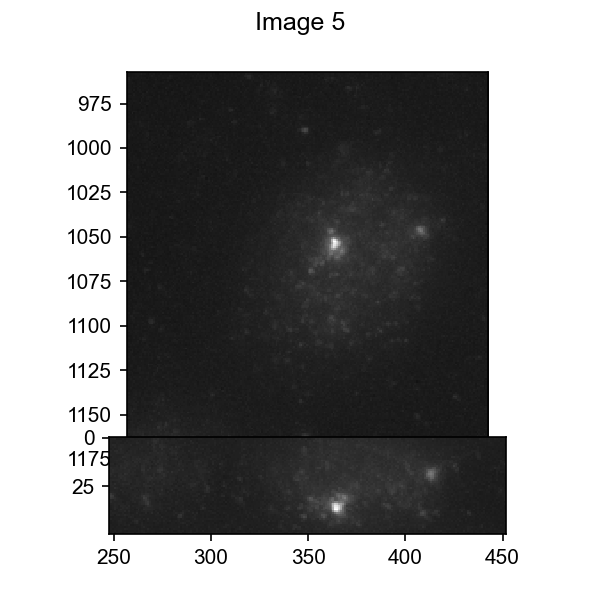

In [35]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(kept_raw_spots):
    _sel_spots = _spots
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(list(gene_unique_ims) + [gene_ims[gene_id]], 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

<IPython.core.display.Javascript object>


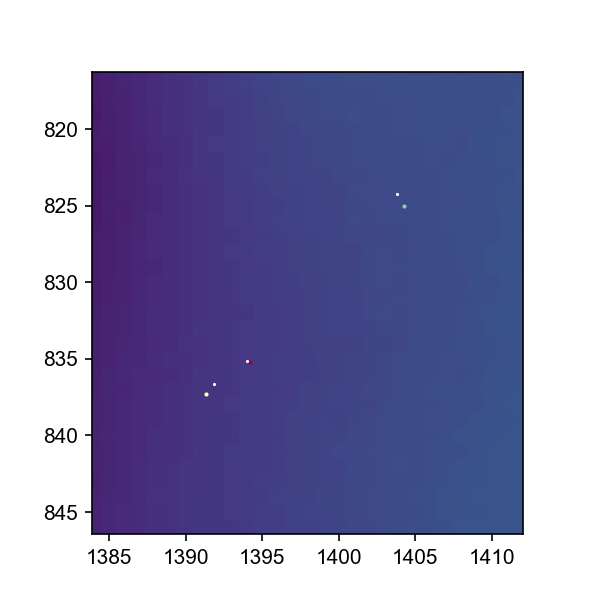

In [50]:
from matplotlib.cm import Spectral
int_th = 200

selected_rids = [0,1,2,3]

plt.figure(figsize=(4,4), dpi=150)
plt.gca().invert_yaxis()
#plt.imshow(masks_2d)
plt.imshow(fov.dapi_im.mean(0), vmin=1000, vmax=5000)

#for _rid, _uspots in enumerate(fov.unique_spots_list):
for _rid in selected_rids:
    _uspots = fov.unique_spots_list[_rid]
    
    unique_spots = fov.unique_spots_list[_rid]
    unique_spots = unique_spots[unique_spots[:,0] > int_th]
    combo_spots = fov.combo_spots_list[_rid]
    combo_spots = combo_spots[combo_spots[:,0] > int_th]

    unique_hzxys = spot_tools.picking.convert_spots_to_hzxys(unique_spots, fov.shared_parameters['distance_zxy'])
    combo_hzxys = spot_tools.picking.convert_spots_to_hzxys(combo_spots, fov.shared_parameters['distance_zxy'])

    kept_uinds = np.where(cdist(unique_hzxys, combo_hzxys).min(1) < 500)[0]
    kept_cinds = np.where(cdist(unique_hzxys, combo_hzxys).min(0) < 500)[0]

    _filtered_uspots = unique_spots[kept_uinds]
    _filtered_cspots = combo_spots[kept_cinds]
    #_filtered_uspots = _uspots[_uspots[:,0] > int_th]
    plt.plot(_filtered_uspots[:,3], _filtered_uspots[:,2], '.', markersize=2, 
             color=Spectral(_rid/len(selected_rids)) )
    plt.plot(_filtered_cspots[:,3], _filtered_cspots[:,2], '.', markersize=1, 
             color=[1,1,1])
    #break
plt.show()

<IPython.core.display.Javascript object>


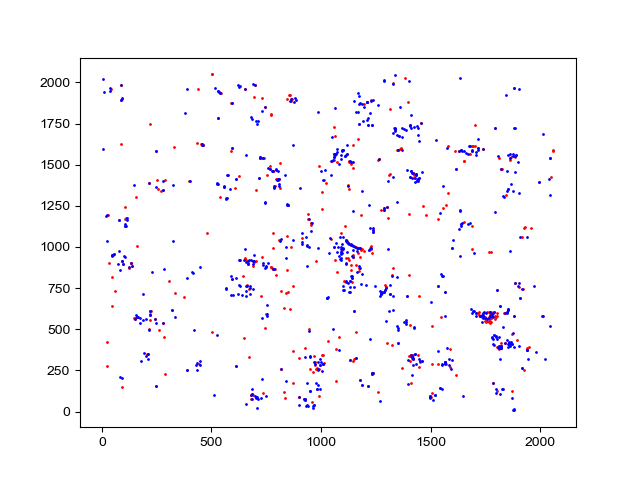

In [31]:
plt.figure()
plt.plot(unique_spots[:,2], unique_spots[:,3], 'r.', markersize=2)
plt.plot(combo_spots[:,2], combo_spots[:,3], 'b.', markersize=2)
plt.show()

In [ ]:
vis_unique_inds = [0,1,2,3,4]
vis_unique_ims, vis_unique_ids, vis_unique_spot_list, vis_unique_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    
    for _ind in vis_unique_inds:
        vis_unique_ims.append(_grp['ims'][_ind])
        vis_unique_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_unique_raw_spot_list.append(_grp['raw_spots'][_ind])

In [35]:
intensity_th = 500
vis_unique_inds = [0,1,2,3,4]
vis_unique_ims, vis_unique_ids, vis_unique_spot_list, vis_unique_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    
    for _ind in vis_unique_inds:
        vis_unique_ims.append(_grp['ims'][_ind])
        vis_unique_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_unique_raw_spot_list.append(_grp['raw_spots'][_ind][_grp['raw_spots'][_ind][:,0] > intensity_th])

<IPython.core.display.Javascript object>


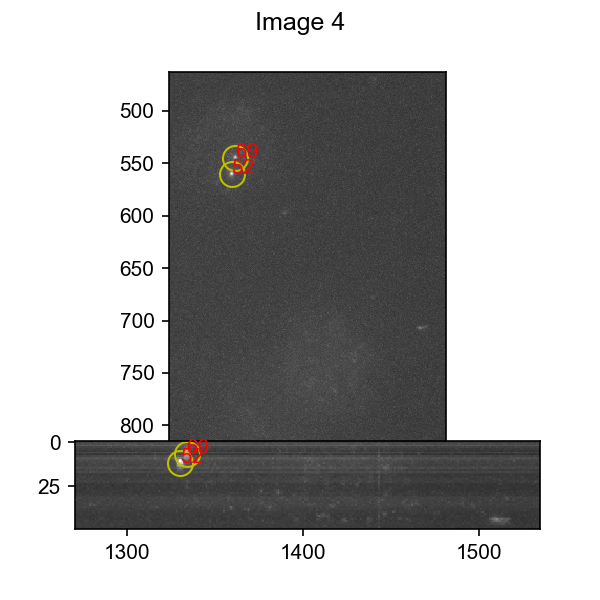

In [36]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_unique_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_unique_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

In [38]:
vis_combo_inds = [0,1,2,3,4]
vis_combo_ims, vis_combo_ids, vis_combo_spot_list, vis_combo_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    
    for _ind in vis_combo_inds:
        vis_combo_ims.append(_grp['ims'][_ind])
        vis_combo_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_combo_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


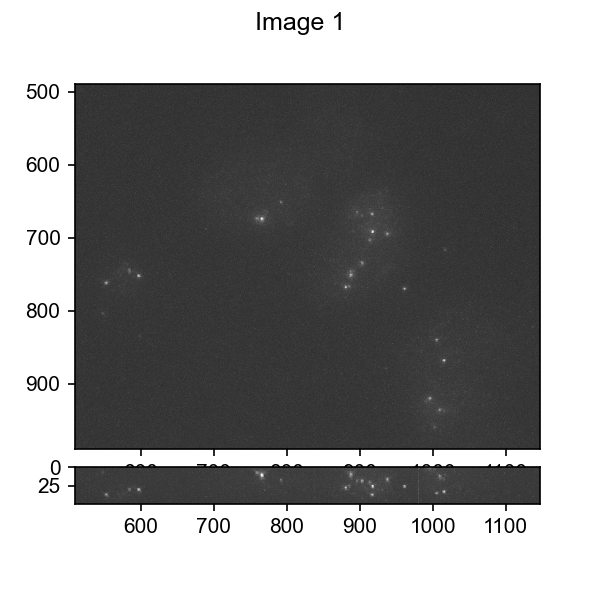

In [45]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_combo_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_combo_ims, 
                               fig=fig,
                               #given_dic=coord_dict,
                               save_file=None,
                               )

In [157]:
vis_merfish_inds = np.arange(0,11)
vis_merfish_ims, vis_merfish_ids, vis_merfish_spot_list, vis_merfish_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['merfish']
    
    for _ind in vis_merfish_inds:
        vis_merfish_ims.append(_grp['ims'][_ind])
        vis_merfish_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_merfish_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


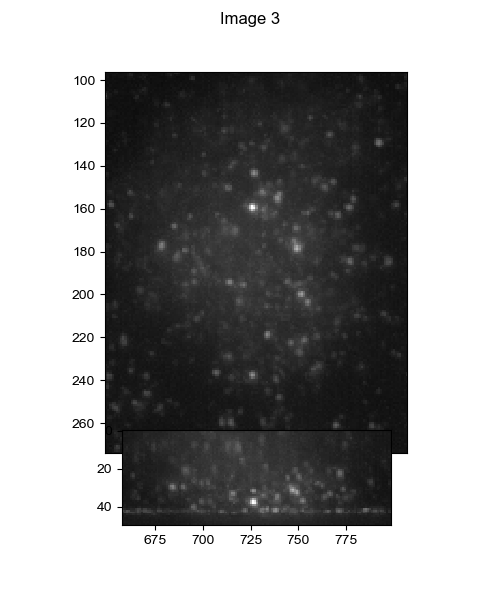

In [159]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_merfish_raw_spot_list):
    _sel_spots = _spots
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(5,6), dpi=100)    
    
visual_tools.imshow_mark_3d_v2(vis_merfish_ims, 
                               fig=fig,
                               #given_dic=coord_dict,
                               save_file=None,
                               )

In [35]:
classes.batch_functions._color_dic_stat(fov.color_dic, fov.channels, fov.shared_parameters['allowed_data_types']).keys()

dict_keys(['combo', 'unique', 'gene'])

In [51]:
vis_gene_inds = [0,1,2,3,4]
vis_gene_ims, vis_gene_ids, vis_gene_spot_list, vis_gene_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['gene']
    
    for _ind in vis_gene_inds:
        vis_gene_ims.append(_grp['ims'][_ind])
        vis_gene_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_gene_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


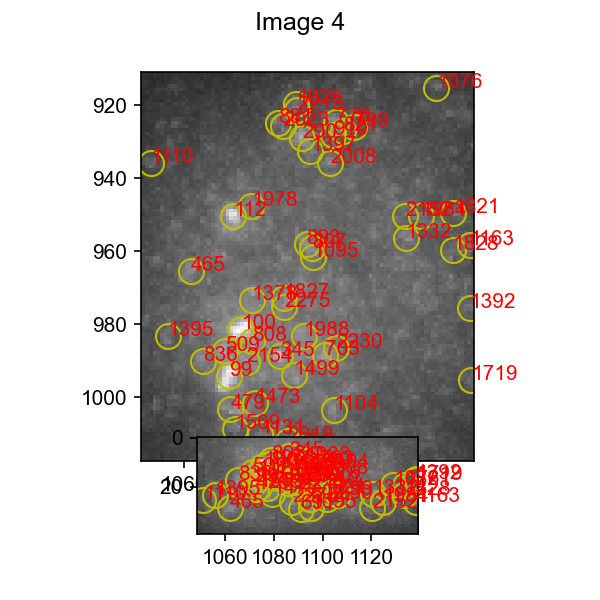

In [52]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_gene_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_gene_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

## Segmentation by Cellpose

In [6]:
import cv2
from cellpose import utils
from cellpose import models

In [21]:
# 3d segmentation
import cellpose
from cellpose import models
model_3d = models.Cellpose(gpu=True, model_type='cyto')
masks_3d, flows_3d, styles_3d, diams_3d = model_3d.eval(fov.dapi_im[:], 
                                                        diameter=60, channels=[0,0], 
                                                        min_size=100,
                                                        do_3D=True)

import torch
torch.cuda.empty_cache()
print(torch.cuda.memory_summary())

2021-07-13 12:03:45,601 [INFO] ** TORCH CUDA version installed and working. **
2021-07-13 12:03:45,602 [INFO] >>>> using GPU
2021-07-13 12:03:45,721 [INFO] ~~~ FINDING MASKS ~~~
2021-07-13 12:03:45,722 [INFO] multi-stack tiff read in as having 60 planes 1 channels
2021-07-13 12:04:03,845 [INFO] running YX: 60 planes of size (2048, 2048)
2021-07-13 12:04:04,563 [INFO] 0%|          | 0/60 [00:00<?, ?it/s]


RuntimeError: CUDA out of memory. Tried to allocate 14.00 MiB (GPU 0; 12.00 GiB total capacity; 8.78 GiB already allocated; 11.63 MiB free; 8.86 GiB reserved in total by PyTorch)

In [16]:
import torch
torch.cuda.empty_cache()
print(torch.cuda.memory_summary())

In [19]:
torch.cuda.empty_cache()

In [18]:
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   52654 KB |    7972 MB |   31907 GB |   31907 GB |
|       from large pool |   37760 KB |    7965 MB |   31869 GB |   31869 GB |
|       from small pool |   14894 KB |      33 MB |      38 GB |      38 GB |
|---------------------------------------------------------------------------|
| Active memory         |   52654 KB |    7972 MB |   31907 GB |   31907 GB |
|       from large pool |   37760 KB |    7965 MB |   31869 GB |

<IPython.core.display.Javascript object>


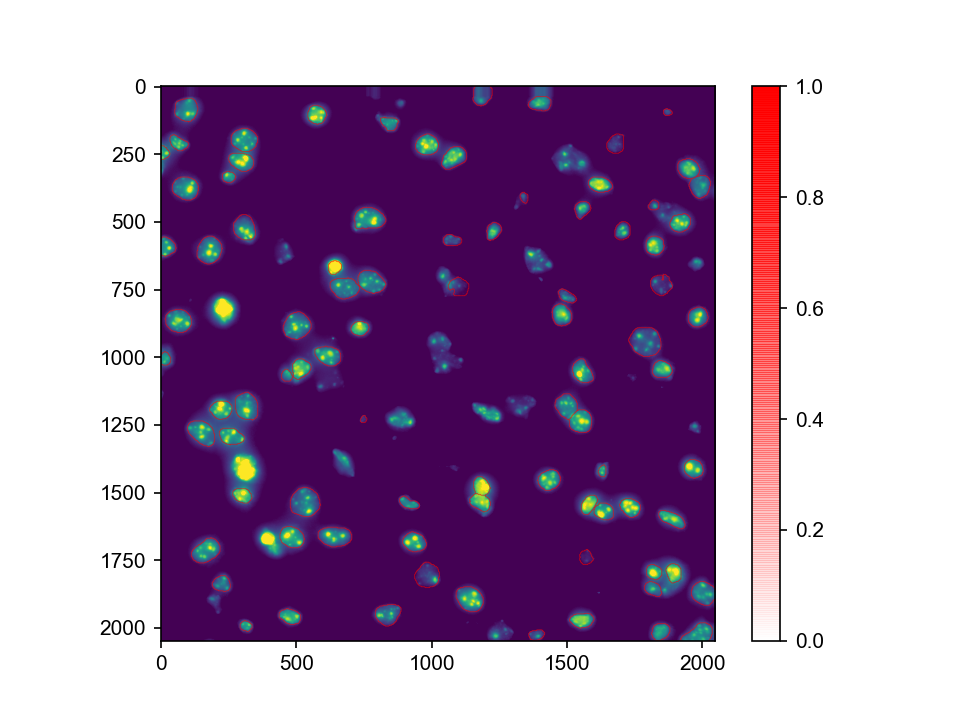

In [28]:
from skimage.segmentation import find_boundaries

plt.figure(dpi=150)
plt.imshow(fov.dapi_im.max(0), vmin=1000, vmax=4000)
plt.imshow(find_boundaries(masks_2d), cmap=figure_tools.color.transparent_gradient([1,0,0]))
plt.colorbar()
plt.show()

In [54]:
flows_2d

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[-1.2696758e-03, -2.1507517e-03,  4.8279762e-06, ...,
          -9.3707815e-04,  8.8630628e-04,  3.4075491e-03],
         [-8.8315830e-04, -2

<IPython.core.display.Javascript object>


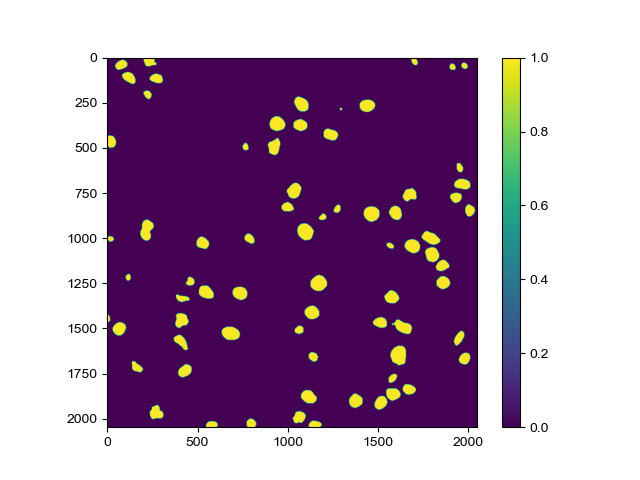

In [70]:
plt.figure()
plt.imshow(masks_2d>0)
plt.colorbar()
plt.show()

In [10]:
# test 3D segmentation
from cellpose import models
model_3d = models.Cellpose(gpu=False, model_type='nuclei')
masks_3d, flows_3d, styles_3d, diams_3d = model.eval(fov.dapi_im[10:30], diameter=50, channels=[0,0], do_3D=True)

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
multi-stack tiff read in as having 20 planes 1 channels

 running YX: 20 planes of size (2048, 2048) 




100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:32<00:00,  9.23s/it]



 running ZY: 2048 planes of size (20, 2048) 




100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [06:21<00:00,  1.49s/it]



 running ZX: 2048 planes of size (20, 2048) 




100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [06:08<00:00,  1.44s/it]


flows computed 3399.48s
dynamics computed 3416.00s
masks computed 3457.83s
estimated masks for 1 image(s) in 3554.92 sec
>>>> TOTAL TIME 3554.92 sec


In [11]:
masks.shape

(20, 2048, 2048)

In [9]:
import torch
torch.cuda.empty_cache()

In [36]:
del(model)

<IPython.core.display.Javascript object>


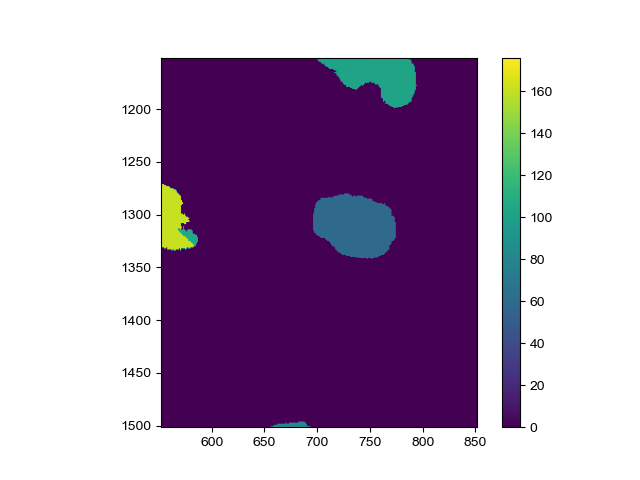

In [13]:
plt.figure()
plt.imshow(masks[10])
plt.colorbar()
plt.show()

In [ ]:
cellposeOutline

In [53]:
import imagedisplay as imdis 

ModuleNotFoundError: No module named 'imagedisplay'

In [ ]:
cellposeOutline = imdis.getMaskBoundaries(masks_cyto)
